## HCP Behavial Data 

In this XP I'll will explore HCP data from different domaine  :
- Demographic
- Physiologic
- Cognitive
- Emotional/Social
- Motor
- Sensory


In [1]:
%matplotlib inline
import os
import numpy as np
import scipy
from scipy import stats, integrate
from scipy import cluster as scl
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn.apionly as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec as gs
import scipy.io as sio
from IPython.display import display# load good stuff


In [2]:
%load_ext oct2py.ipython

In [25]:
# Load pheno file
#path_root = '/media/yassinebha/database29/Drive/HCP/'
path_root = '/home/yassinebha/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))

In [26]:
data.head()

Subject  Age_in_Yrs Twin_Stat Zygosity  Mother_ID  Father_ID   Race  \
0   100004          24   NotTwin  NotTwin      52259    82122.0  White   
1   100206          27   NotTwin  NotTwin      56037    85858.0  White   
2   100307          27      Twin    NotMZ      51488    81352.0  White   
3   100408          33      Twin       MZ      51730    81594.0  White   
4   100610          27      Twin    NotMZ      52813    82634.0  White   

             Ethnicity  Handedness  SSAGA_Employ     ...      NEORAW_60  \
0  Not Hispanic/Latino          95           2.0     ...              A   
1  Not Hispanic/Latino          65           2.0     ...              N   
2  Not Hispanic/Latino          95           2.0     ...              A   
3  Not Hispanic/Latino          55           2.0     ...              A   
4  Not Hispanic/Latino          85           2.0     ...              A   

   Noise_Comp  Odor_Unadj  Odor_AgeAdj  PainInterf_Tscore  Taste_Unadj  \
0         5.2      101.12        86.45               45.9       107.17   
1         NaN      108.79        97.19               49.7        72.63   
2         3.6      101.12        86.45               38.6        71.69   
3         2.0      108.79        98.04               52.6       114.01   
4         2.0      122.25       110.45               38.6        84.84   

   Taste_AgeAdj  Mars_Log_Score  Mars_Errs  Mars_Final  
0        105.31            1.80        0.0        1.80  
1         72.03            1.84        0.0        1.84  
2         71.76            1.76        0.0        1.76  
3        113.59            1.76        2.0        1.68  
4         85.31            1.92        1.0        1.88  

[5 rows x 549 columns]

# Demographic Domain

In [27]:
behav_demog = ["Age_in_Yrs","Gender","Handedness","Zygosity","Race","Ethnicity","SSAGA_Income","SSAGA_Educ"]
data_demog = data.get(behav_demog)

In [28]:
data_demog.Zygosity.value_counts()

NotTwin    494
NotMZ      250
MZ         225
Name: Zygosity, dtype: int64

In [29]:
# Replace cathegorical variable with numeric value
# Gender -->'M':1,'F':2
# Zygosity --> 'NotTwin':0, 'NotMZ':1, 'MZ':2
# Ethnicity --> 'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2
# Race --> 'White':0, 'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2, 
#          'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 
data_demog.Gender.replace({'M':1,'F':2}, inplace=True)
data_demog.Zygosity.replace({'NotTwin':0, 'NotMZ':1, 'MZ':2}, inplace=True)
data_demog.Ethnicity.replace({'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 
                              'Unknown or Not Reported':2}, inplace=True)
data_demog.Race.replace({'White':0 ,'Black or African Am.':1,
                         'Asian/Nat. Hawaiian/Othr Pacific Is.':2,'More than one':3,
                         'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 }, inplace=True)

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Shapiro-test


DF  Test Statistic       p-value
Age_in_Yrs    969        0.968613  1.282768e-13
Gender        969        0.631552  2.751029e-41
Handedness    969        0.699805  2.241741e-38
Zygosity      968        0.745477  4.272761e-36
Race          969        0.564953  9.949219e-44
Ethnicity     969        0.322351  0.000000e+00
SSAGA_Income  964        0.927347  3.372751e-21
SSAGA_Educ    968        0.849325  2.215921e-29

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


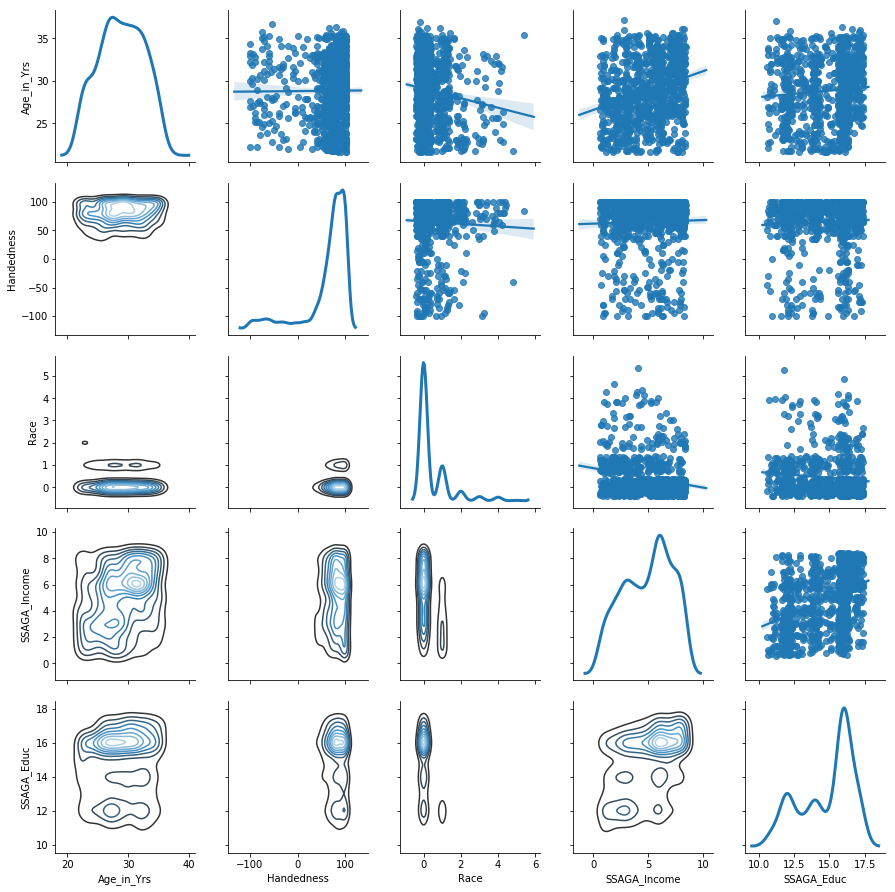

In [8]:
# Test for normality
x = data_demog.Age_in_Yrs.dropna()
y = data_demog.Gender.dropna()
z = data_demog.Handedness.dropna()
u = data_demog.Zygosity.dropna()
v = data_demog.Race.dropna()
w = data_demog.Ethnicity.dropna()
s = data_demog.SSAGA_Income.dropna()
t = data_demog.SSAGA_Educ.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)
shapiro_results_s = scipy.stats.shapiro(s)
shapiro_results_t = scipy.stats.shapiro(t)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1,len(s) - 1,len(t) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              shapiro_results_s[0],shapiro_results_t[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       shapiro_results_s[1],shapiro_results_t[1]]}
df = pd.DataFrame(dict_sw,index=["Age_in_Yrs","Gender","Handedness","Zygosity",
                                 "Race","Ethnicity","SSAGA_Income","SSAGA_Educ"])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_demog.get(["Age_in_Yrs","Handedness","Race","SSAGA_Income","SSAGA_Educ"]).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

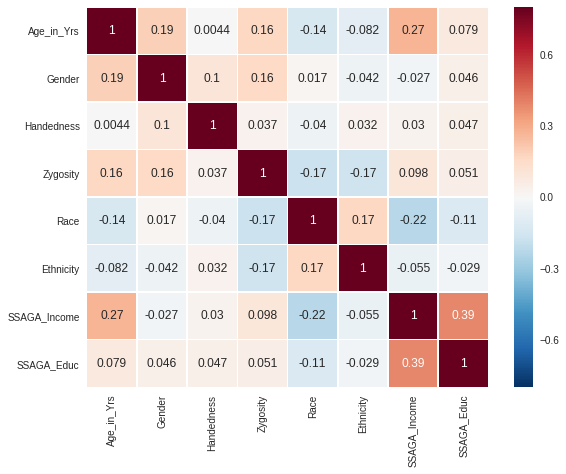

In [30]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_demog.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

### The most correlated Demog data

- #### Income and Years of Education

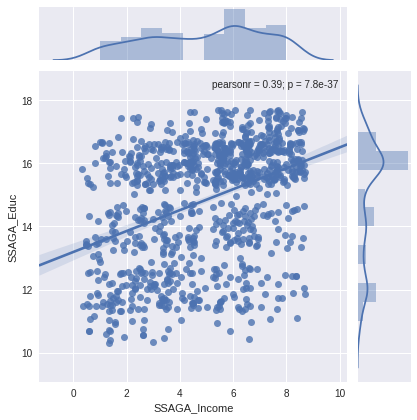

In [10]:
sns.set(color_codes=True)
sns.jointplot(x="SSAGA_Income", y="SSAGA_Educ", x_jitter=.7,y_jitter=.7,data=data_demog,kind="reg");

- ####  Income and Age

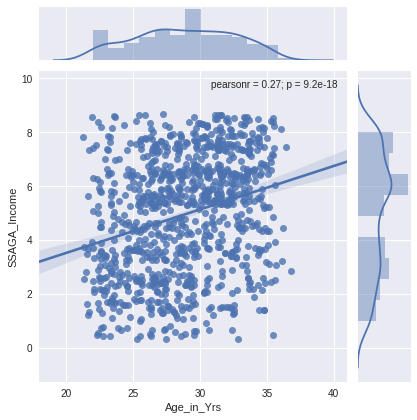

In [11]:
sns.set(color_codes=True)
sns.jointplot(x="Age_in_Yrs", y="SSAGA_Income", data=data_demog, x_jitter=.7,y_jitter=.7,kind='reg');

#### Gender differences 
- **Incomes**

Total household income: 
- <$10,000 = 1
- 10K-19,999 = 2
- 20K-29,999 = 3
- 30K-39,999 = 4
- 40K-49,999 = 5
- 50K-74,999 = 6
- 75K-99,999 = 7
- 100,000 and more = 8

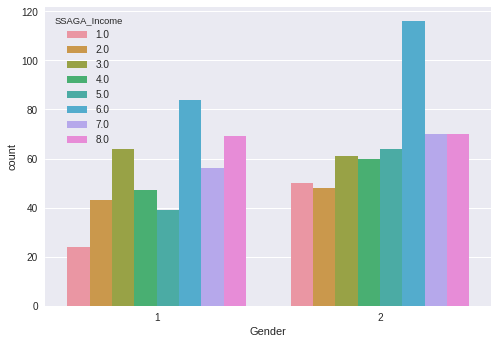

In [12]:
#'Male':1,'Female':2
sns.countplot(x='Gender',hue='SSAGA_Income',data=data_demog)

- **Education**

Years of education completed: <11 = 11; 12; 13; 14; 15; 16; 17+ = 17

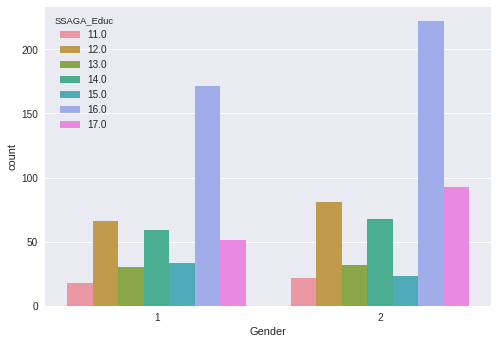

In [13]:
# Gender difference - Education

sns.countplot(x='Gender',hue='SSAGA_Educ',data=data_demog)

# Physiologic Domaine

BMI: Body Mass Index

BPSystolic: Blood Pressure - Systolic

BPDiastolic: Blood Pressure - Diastolic

PSQI_Score: Sleep (Pittsburgh Sleep Questionnaire) 

In [31]:
behav_physio = ["BMI","BPSystolic","BPDiastolic","PSQI_Score"]
data_physio = data.get(behav_physio)
data_physio.describe()

BMI  BPSystolic  BPDiastolic  PSQI_Score
count  969.000000  951.000000   951.000000  970.000000
mean    27.180454  124.788644    77.345952    5.268041
std      5.887978   15.160632    11.033117    3.023183
min     16.480000   87.000000    28.000000    0.000000
25%     23.000000  114.500000    70.000000    3.000000
50%     25.930000  123.000000    77.000000    5.000000
75%     30.210000  134.000000    84.000000    7.000000
max     48.250000  247.000000   130.000000   19.000000

Shapiro-test


DF  Test Statistic       p-value
BMI          968        0.932937  1.954226e-20
BPSystolic   950        0.957172  4.754663e-16
BPDiastolic  950        0.987673  3.610366e-07
PSQI_Score   969        0.944920  1.568539e-18

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


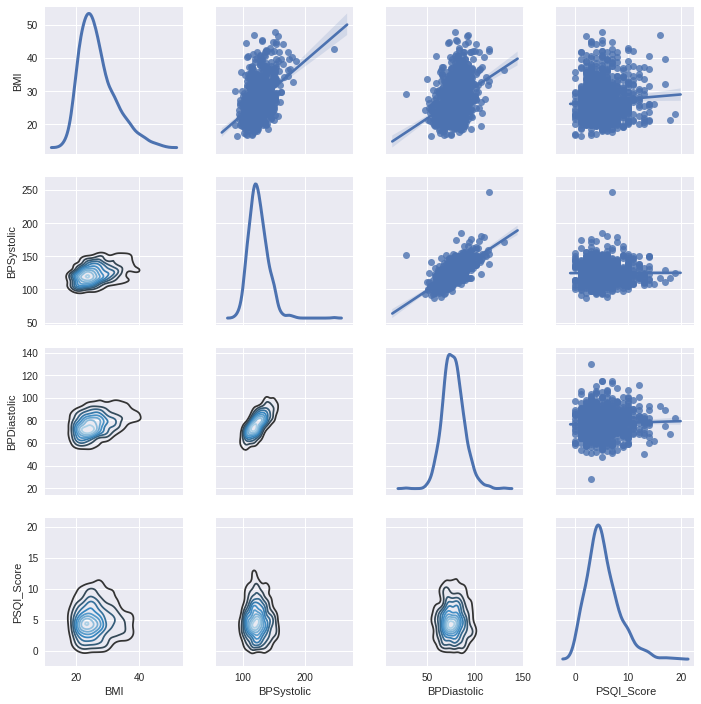

In [14]:
# Test for normality
x = data_physio.BMI.dropna()
y = data_physio.BPSystolic.dropna()
z = data_physio.BPDiastolic.dropna()
u = data_physio.PSQI_Score.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1]]}
df = pd.DataFrame(dict_sw,index=['BMI','BPSystolic','BPDiastolic','PSQI_Score'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_physio.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

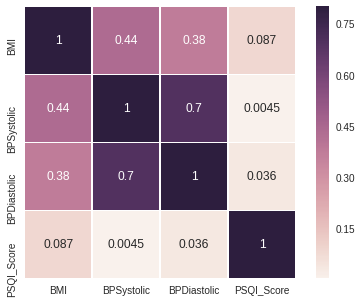

In [16]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_physio.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

### The most correlated Physiodata

**- Systolic and Diastolic Blood Pressure**

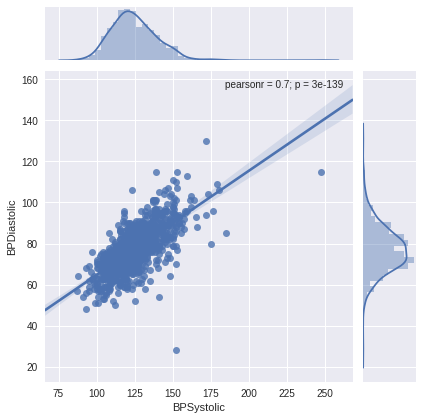

In [17]:
sns.set(color_codes=True)
sns.jointplot(x="BPSystolic", y="BPDiastolic",data=data_physio,kind="reg");

**- BMI and Systolic Blood Pressure**

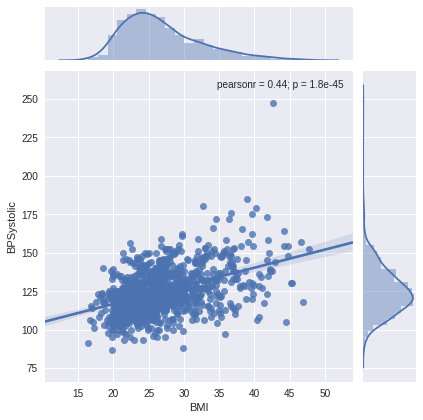

In [18]:
sns.set(color_codes=True)
sns.jointplot(x="BMI", y="BPSystolic",data=data_physio,kind="reg");

# Cognitive Domain

- ### Instrument: Episodic Memory (Picture Sequence Memory)


*The Picture Sequence Memory Test is a measure developed for the Open of episodic memory for ages 3-85 years. It involves recalling increasingly lengthy series of illustrated objects and activities that are presented in a particular order on the computer screen. The participants are asked to recall the sequence of pictures that is demonstrated over two learning trials; sequence length varies from 6-18 pictures, depending on age. Participants are given credit for each adjacent pair of pictures (i.e., if pictures in locations 7 and 8 and placed in that order and adjacent to each other anywhere - such as slots 1 and 2 - one point is awarded) they correctly place, up to the maximum value for the sequence, which is one less than the sequence length (if there are 18 pictures in the sequence, the maximum score is 17, because that is the number of adjacent pairs of pictures that exist). The test takes approximately 7 minutes to administer. This test is recommended for ages 3-85.*

In [32]:
behav_cog_EpMem = ["PicSeq_Unadj"]
data_cog_EpMem = data.get(behav_cog_EpMem)
data_cog_EpMem.describe()

PicSeq_Unadj
count    969.000000
mean     111.278029
std       13.527188
min       76.420000
25%      102.180000
50%      109.960000
75%      120.320000
max      135.550000

DF  Test Statistic       p-value
PicSeq_Unadj  968        0.974016  3.810157e-12

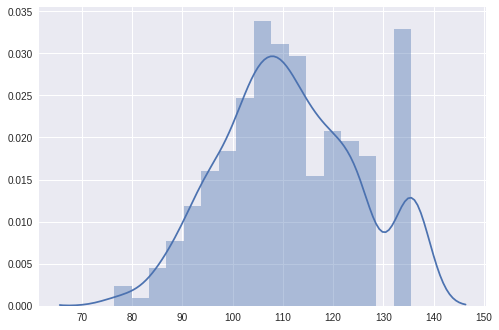

In [20]:
# shapiro test
x = data_cog_EpMem.PicSeq_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)
# Result Table
dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
display(pd.DataFrame(dict_sw,index=['PicSeq_Unadj']))
# Plot distribution
sns.distplot(data_cog_EpMem.loc[~data_cog_EpMem.PicSeq_Unadj.isnull()].PicSeq_Unadj.as_matrix());

- ### Instrument: Executive Function

   - #### Cognitive Flexibility (Dimensional Change Card Sort)
   
   *DCCS is a measure of cognitive flexibility. Two target pictures are presented that vary along two dimensions (e.g., shape and color). Participants are asked to match a series of bivalent test pictures (e.g., yellow balls and blue trucks) to the target pictures, first according to one dimension (e.g., color) and then, after a number of trials, according to the other dimension (e.g., shape). "Switch" trials are also employed, in which the participant must change the dimension being matched. For example, after 4 straight trials matching on shape, the participant may be asked to match on color on the next trial and then go back to shape, thus requiring the cognitive flexibility to quickly choose the correct stimulus. Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 4 minutes to administer. This test is recommended for ages 3-85.*
   
   - #### Inhibition (Flanker Task)
   *The Flanker task measures both a participant's attention and inhibitory control. The test requires the participant to focus on a given stimulus while inhibiting attention to stimuli (fish for ages 3-7 or arrows for ages 8-85) flanking it. Sometimes the middle stimulus is pointing in the same direction as the "flankers" (congruent) and sometimes in the opposite direction (incongruent). Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 3 minutes to administer. This test is recommended for ages 3-85.*

In [33]:
behav_cog_ExFun = ["CardSort_Unadj","Flanker_Unadj"]
data_cog_ExFun = data.get(behav_cog_ExFun)
data_cog_ExFun.describe()

CardSort_Unadj  Flanker_Unadj
count      967.000000     970.000000
mean       114.636298     112.063784
std         10.327818       9.995911
min         80.940000      84.900000
25%        107.710000     105.230000
50%        114.320000     111.890000
75%        121.300000     118.280000
max        143.940000     142.110000

Shapiro-test


DF  Test Statistic   p-value
CardSort_Unadj  966        0.994584  0.001526
Flanker_Unadj   969        0.994780  0.001996

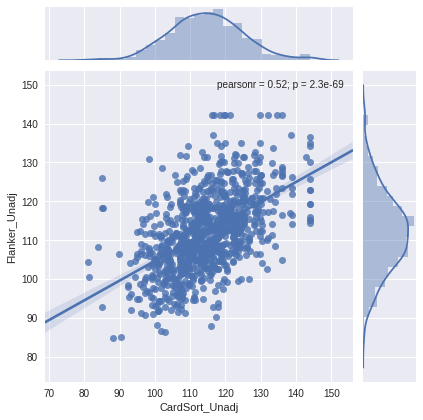

In [22]:
# Test for normality
x = data_cog_ExFun.CardSort_Unadj.dropna()
y = data_cog_ExFun.Flanker_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['CardSort_Unadj','Flanker_Unadj'])
print('Shapiro-test')
display(df)
# plot  dist
sns.jointplot(x="CardSort_Unadj", y="Flanker_Unadj",data=data_cog_ExFun.dropna(),kind="reg");

- ### Instrument: Fluid Intelligence (Penn Progressive Matrices)

    *Fluid intelligence is measured using Raven’s Progressive Matrices (Prabhakaran et al. 1997; Christoff et al. 2001; Gray et al. 2003; Conway et al. 2005; Gray et al. 2005; Wendelken et al. 2008). We use Form A of an abbreviated version of the Raven’s developed by Gur and colleagues (Bilker et al. 2012). Participants are presented with patterns made up of 2x2, 3x3 or 1x5 arrangements of squares, with one of the squares missing. The participant must pick one of five response choices that best fits the missing square on the pattern. The task has 24 items and 3 bonus items, arranged in order of increasing difficulty. However, the task discontinues if the participant makes 5 incorrect responses in a row.
    *
    
    ```
    Number of Correct Responses (PMAT24_A_CR)
    Median Reaction Time for Correct Responses (PMAT24_A_RTCR)```

In [34]:
behav_cog_FluInt = ["PMAT24_A_CR","PMAT24_A_RTCR"]
data_cog_FluInt = data.get(behav_cog_FluInt)
data_cog_FluInt.describe()

PMAT24_A_CR  PMAT24_A_RTCR
count   964.000000     964.000000
mean     16.428423   15239.259336
std       4.893472    9178.040837
min       4.000000    1989.000000
25%      13.000000    7338.750000
50%      18.000000   14254.500000
75%      20.000000   20787.000000
max      24.000000   61641.000000

Shapiro-test


DF  Test Statistic       p-value
PMAT24_A_CR    963        0.939192  2.038537e-19
PMAT24_A_RTCR  963        0.937928  1.285344e-19

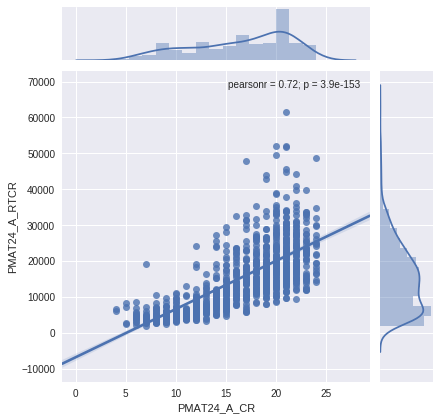

In [24]:
# Test for normality
x = data_cog_FluInt.PMAT24_A_CR.dropna()
y = data_cog_FluInt.PMAT24_A_RTCR.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['PMAT24_A_CR','PMAT24_A_RTCR'])
print('Shapiro-test')
display(df)
# plot  dist
sns.jointplot(x="PMAT24_A_CR", y="PMAT24_A_RTCR",data=data_cog_FluInt.dropna(),kind="reg");

- ### Instrument: Language

  - #### Reading Decoding (Oral Reading Recognition)

    *Separate but parallel reading tests have been developed in English and in Spanish. In either language, the participant is asked to read and pronounce letters and words as accurately as possible. The test administrator scores them as right or wrong. For the youngest children, the initial items require them to identify letters (as opposed to symbols) and to identify a specific letter in an array of 4 symbols. The test is given via a computerized adaptive format and requires approximately 3 minutes. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*
  
  - #### Vocabulary Comprehension (Picture Vocabulary)
   
   *This measure of receptive vocabulary is administered in a computerized adaptive format. The respondent is presented with an audio recording of a word and four photographic images on the computer screen and is asked to select the picture that most closely matches the meaning of the word. This test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [35]:
behav_cog_Lang = ["ReadEng_Unadj","PicVocab_Unadj"]
data_cog_Lang= data.get(behav_cog_Lang)
data_cog_Lang.describe()

ReadEng_Unadj  PicVocab_Unadj
count     970.000000      970.000000
mean      116.266997      116.232152
std        10.892207        9.813873
min        84.200000       90.690000
25%       109.092600      110.174075
50%       116.840000      116.598500
75%       124.007500      122.839850
max       150.710000      153.088900

Shapiro-test


DF  Test Statistic   p-value
ReadEng_Unadj   969        0.992754  0.000112
PicVocab_Unadj  969        0.994745  0.001896

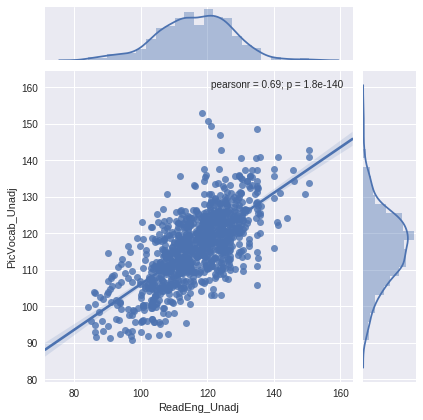

In [25]:
# Test for normality
x = data_cog_Lang.ReadEng_Unadj.dropna()
y = data_cog_Lang.PicVocab_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['ReadEng_Unadj','PicVocab_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj",data=data_cog_Lang.dropna(),kind="reg");

- ### Instrument: Processing Speed (Pattern Completion Processing Speed)
    
    *This test measures speed of processing by asking participants to discern whether two side-by-side pictures are the same or not. Participants' raw score is the number of items correct in a 90-second period. The items are designed to be simple to most purely measure processing speed. The test overall takes approximately 3 minutes to administer. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*

In [36]:
behav_cog_ProcSpee = ["ProcSpeed_Unadj"]
data_cog_ProcSpee= data.get(behav_cog_ProcSpee)
data_cog_ProcSpee.describe()

ProcSpeed_Unadj
count       970.000000
mean        113.614021
std          14.776429
min          51.620000
25%         104.060000
50%         112.495000
75%         121.625000
max         154.690000

Shapiro-test


DF  Test Statistic       p-value
ProcSpeed_Unadj  969        0.986923  1.303356e-07

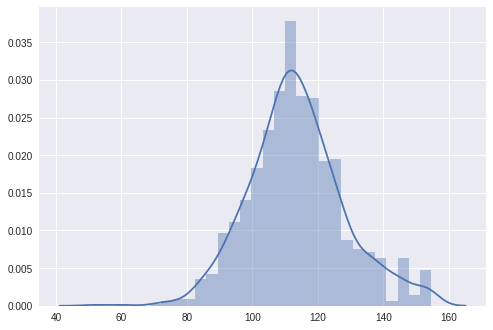

In [37]:
x = data_cog_ProcSpee.ProcSpeed_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['ProcSpeed_Unadj']))

# Plot distribution
sns.distplot(data_cog_ProcSpee.ProcSpeed_Unadj.as_matrix());

- ### Instrument: Self-regulation/Impulsivity (Delay Discounting)

    *Delay discounting describes the undervaluing of rewards that are delayed in time. It is illustrated by the fact that humans (and other animals) will often choose a smaller immediate reward over an objectively larger, but delayed reward. We use a version of the discounting task that identifies ‘indifference points’ at which a person is equally likely to choose a smaller reward (e.g., $100) sooner versus a larger reward later (e.g., $200 in 3 years). Based on the work of Green and Myerson (Estle et al. 2006; Green et al. 2007), we use an adjusting-amount approach, in which delays are fixed and reward amounts are adjusted on a trial-by-trial basis based on participants’ choices, to rapidly hone in on indifference points. This approach has been repeatedly validated to provide reliable estimates of delay discounting (Estle et al. 2006). As a summary measure, we use an area-under-the-curve discounting measure (AUC) that provides a valid and reliable index of how steeply an individual discounts delayed rewards (Myerson et al. 2001).
*

```
DDisc_AUC_200: Area Under the Curve for Discounting of $200
DDisc_AUC_40K: Area Under the Curve for Discounting of $40,000```

In [38]:
behav_cog_SelfReg = ["DDisc_AUC_200","DDisc_AUC_40K"]
data_cog_SelfReg= data.get(behav_cog_SelfReg)
data_cog_SelfReg.describe()

DDisc_AUC_200  DDisc_AUC_40K
count     964.000000     964.000000
mean        0.248377       0.488202
std         0.202812       0.288475
min         0.015692       0.015625
25%         0.096942       0.238281
50%         0.188869       0.476628
75%         0.329884       0.744792
max         0.984442       0.984375

Shapiro-test


DF  Test Statistic       p-value
DDisc_AUC_200  963        0.863473  3.930351e-28
DDisc_AUC_40K  963        0.950971  2.186620e-17

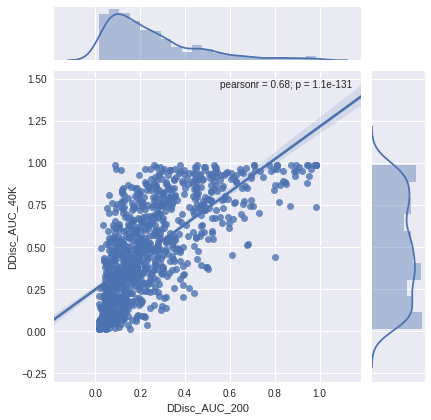

In [29]:
# Test for normality
x = data_cog_SelfReg.DDisc_AUC_200.dropna()
y = data_cog_SelfReg.DDisc_AUC_40K.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['DDisc_AUC_200','DDisc_AUC_40K'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="DDisc_AUC_200", y="DDisc_AUC_40K",data=data_cog_SelfReg.dropna(),kind="reg");

- ### Instrument: Spatial Orientation (Variable Short Penn Line Orientation Test)

     *Spatial orientation processing is measured using the Variable Short Penn Line Orientation Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown two lines with different orientations. They have to rotate one of the lines (a moveable blue one) so that is parallel to the other line (a fixed red line). The rotation of the blue line is accomplished by clicking buttons on the keyboard that rotate the lines either clockwise or counterclockwise. Across trials, the lines vary in their relative location on the screen, though the distance between the centers of the two lines is always the same. The length of the red line is always the same, but the length of the blue line can be either short or long. There are a total of 24 trials*
     
```
VSPLOT_TC: Total Number Correct
VSPLOT_CRTE: Median Reaction Time Divided by Expected Number of Clicks for Correct ```

In [39]:
behav_cog_SpacOri = ["VSPLOT_TC","VSPLOT_CRTE"]
data_cog_SpacOri= data.get(behav_cog_SpacOri)
data_cog_SpacOri.describe()

VSPLOT_TC  VSPLOT_CRTE
count  963.000000   963.000000
mean    14.587747  1150.712112
std      4.520378   356.623313
min      1.000000   493.086360
25%     12.000000   913.830400
50%     15.000000  1101.909000
75%     18.000000  1322.119000
max     26.000000  3255.687500

Shapiro-test


DF  Test Statistic       p-value
VSPLOT_TC    962        0.986812  1.281947e-07
VSPLOT_CRTE  962        0.920622  4.358883e-22

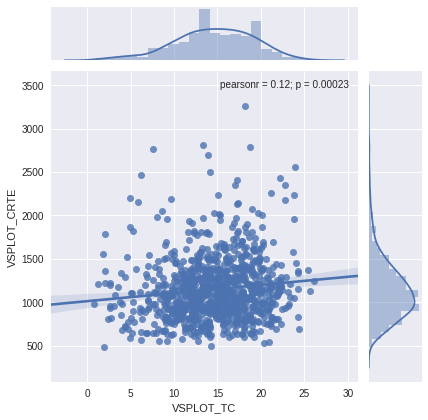

In [31]:
# Test for normality
x = data_cog_SpacOri.VSPLOT_TC.dropna()
y = data_cog_SpacOri.VSPLOT_CRTE.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['VSPLOT_TC','VSPLOT_CRTE'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="VSPLOT_TC", y="VSPLOT_CRTE",data=data_cog_SpacOri.dropna(),kind="reg",x_jitter=.4);

- ### Instrument: Sustained Attention (Short Penn Continuous Performance Test)
    
    *Continuous sustained attention is measured using the Short Penn Continuous Performance Test (Number/Letter Version) (Gur et al. 2001; Gur et al. 2001; Gur et al. 2010). Participants see vertical and horizontal red lines flash on the computer screen. In one block, they must press the spacebar when the lines form a number and in the other block they press the spacebar when the lines form a letter. The lines are displayed for 300 ms followed by a 700 ms ITI. Each block contains 90 stimuli and lasts for 1.5 minutes.*


```SCPT_TPRT:  Short Penn CPT Median Response Time for True Positive Responses
SCPT_TP: True Positives = Sum of CPN_TP and CPL_TP  (SCPT_TP)
SCPT_TN: True Negatives = Sum of CPN_TN and CPL_TPN  (SCPT_TN )```

In [40]:
behav_cog_SusAtt = ["SCPT_TP","SCPT_TN","SCPT_TPRT"]
data_cog_SusAtt= data.get(behav_cog_SusAtt)
data_cog_SusAtt.describe()

SCPT_TP     SCPT_TN   SCPT_TPRT
count  964.000000  964.000000  962.000000
mean    57.187759  114.434647  472.976611
std      4.264736    4.386906   42.751249
min      0.000000   92.000000  360.000000
25%     56.000000  112.000000  442.250000
50%     58.000000  115.000000  470.000000
75%     59.000000  118.000000  500.000000
max     60.000000  120.000000  650.000000

Shapiro-test


DF  Test Statistic       p-value
SCPT_TP    963        0.549136  3.643376e-44
SCPT_TN    963        0.879452  1.115997e-26
SCPT_TPRT  961        0.979843  2.835092e-10

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


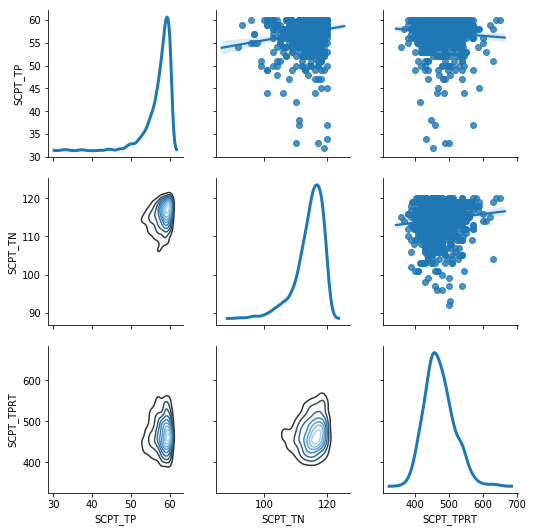

In [97]:
# Test for normality
x = data_cog_SusAtt.SCPT_TP.dropna()
y = data_cog_SusAtt.SCPT_TN.dropna()
z = data_cog_SusAtt.SCPT_TPRT.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1]]}
df = pd.DataFrame(dict_sw,index=["SCPT_TP","SCPT_TN","SCPT_TPRT"])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_cog_SusAtt.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

- ### Instrument: Verbal Episodic Memory (Penn Word Memory Test)

    *Verbal episodic memory is measured using Form A of the Penn Word Memory Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown 20 words and asked to remember them for a subsequent memory test. They are then shown 40 words (the 20 previously presented words and 20 new words matched on memory related characteristics). They decide whether they have seen the word previously by choosing among “definitely yes,” “probably yes,” “probably no,” and “definitely no.”*

```
IWRD_TOT: Total Number of Correct Responses
IWRD_RTC: Median Reaction Time for Correct Responses
```

In [41]:
behav_cog_EpiMem = ["IWRD_TOT","IWRD_RTC"]
data_cog_EpiMem= data.get(behav_cog_EpiMem)
data_cog_EpiMem.describe()

IWRD_TOT     IWRD_RTC
count  964.000000   964.000000
mean    35.484440  1564.383299
std      2.985386   295.503640
min     22.000000   987.500000
25%     34.000000  1373.687500
50%     36.000000  1520.625000
75%     38.000000  1690.000000
max     40.000000  3459.250000

Shapiro-test


DF  Test Statistic       p-value
IWRD_TOT  963        0.944945  1.827035e-18
IWRD_RTC  963        0.881495  1.754165e-26

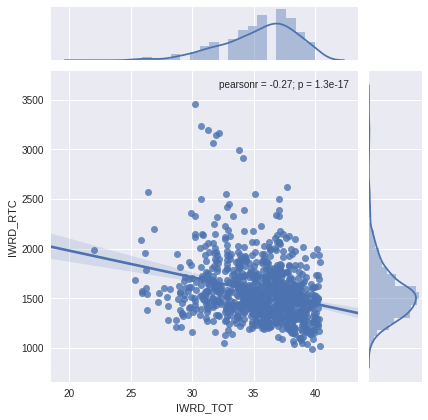

In [35]:
# Test for normality
x = data_cog_EpiMem.IWRD_TOT.dropna()
y = data_cog_EpiMem.IWRD_RTC.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['IWRD_TOT','IWRD_RTC'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="IWRD_TOT", y="IWRD_RTC",data=data_cog_EpiMem.dropna(),kind="reg",x_jitter=.4);

In [42]:
behav_cog = behav_cog_EpMem+behav_cog_ExFun+behav_cog_FluInt+behav_cog_Lang+behav_cog_ProcSpee+behav_cog_SelfReg+behav_cog_SpacOri+behav_cog_SusAtt+behav_cog_EpiMem
data_cog= data.get(behav_cog)
data_cog.describe()

PicSeq_Unadj  CardSort_Unadj  Flanker_Unadj  PMAT24_A_CR  \
count    969.000000      967.000000     970.000000   964.000000   
mean     111.278029      114.636298     112.063784    16.428423   
std       13.527188       10.327818       9.995911     4.893472   
min       76.420000       80.940000      84.900000     4.000000   
25%      102.180000      107.710000     105.230000    13.000000   
50%      109.960000      114.320000     111.890000    18.000000   
75%      120.320000      121.300000     118.280000    20.000000   
max      135.550000      143.940000     142.110000    24.000000   

       PMAT24_A_RTCR  ReadEng_Unadj  PicVocab_Unadj  ProcSpeed_Unadj  \
count     964.000000     970.000000      970.000000       970.000000   
mean    15239.259336     116.266997      116.232152       113.614021   
std      9178.040837      10.892207        9.813873        14.776429   
min      1989.000000      84.200000       90.690000        51.620000   
25%      7338.750000     109.092600      110.174075       104.060000   
50%     14254.500000     116.840000      116.598500       112.495000   
75%     20787.000000     124.007500      122.839850       121.625000   
max     61641.000000     150.710000      153.088900       154.690000   

       DDisc_AUC_200  DDisc_AUC_40K   VSPLOT_TC  VSPLOT_CRTE     SCPT_TP  \
count     964.000000     964.000000  963.000000   963.000000  964.000000   
mean        0.248377       0.488202   14.587747  1150.712112   57.187759   
std         0.202812       0.288475    4.520378   356.623313    4.264736   
min         0.015692       0.015625    1.000000   493.086360    0.000000   
25%         0.096942       0.238281   12.000000   913.830400   56.000000   
50%         0.188869       0.476628   15.000000  1101.909000   58.000000   
75%         0.329884       0.744792   18.000000  1322.119000   59.000000   
max         0.984442       0.984375   26.000000  3255.687500   60.000000   

          SCPT_TN   SCPT_TPRT    IWRD_TOT     IWRD_RTC  
count  964.000000  962.000000  964.000000   964.000000  
mean   114.434647  472.976611   35.484440  1564.383299  
std      4.386906   42.751249    2.985386   295.503640  
min     92.000000  360.000000   22.000000   987.500000  
25%    112.000000  442.250000   34.000000  1373.687500  
50%    115.000000  470.000000   36.000000  1520.625000  
75%    118.000000  500.000000   38.000000  1690.000000  
max    120.000000  650.000000   40.000000  3459.250000

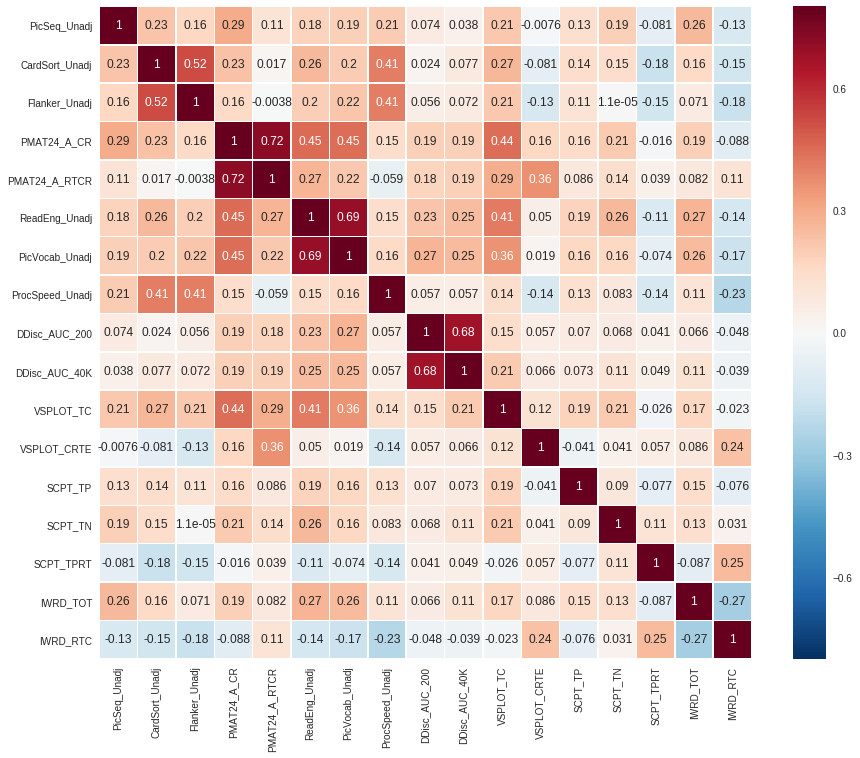

In [43]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data_cog.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Emotional Domaine

- ### Instrument: Emotion Recognition (Penn Emotion Recognition Test)

   *Emotion processing is measured using the Penn Emotion Recognition Test (Gur et al. 2001a; Gur et al. 2010). Participants are presented with 40 faces, one at a time. They are asked to choose what emotion the face is showing from five choices: Happy, Sad, Angry, Scared and No Feeling. Half of the faces are males and half are females. There are 8 faces each that have a happy, sad, angry, scared or no feeling expression.* 
   
```
ER40_CR: Number of Correct Responses
ER40_CRT: Correct Responses Median Response Time (ms)```
    

In [44]:
behav_emot_EmoRec = ["ER40_CR","ER40_CRT"]
data_emot_EmoRec= data.get(behav_emot_EmoRec)
data_emot_EmoRec.describe()

ER40_CR     ER40_CRT
count  964.000000   964.000000
mean    35.537344  1842.682573
std      2.549134   331.810456
min     24.000000  1248.000000
25%     34.000000  1614.500000
50%     36.000000  1780.000000
75%     37.000000  2010.000000
max     40.000000  5020.000000

Shapiro-test


DF  Test Statistic       p-value
ER40_CR   963        0.935125  4.732675e-20
ER40_CRT  963        0.872291  2.393359e-27

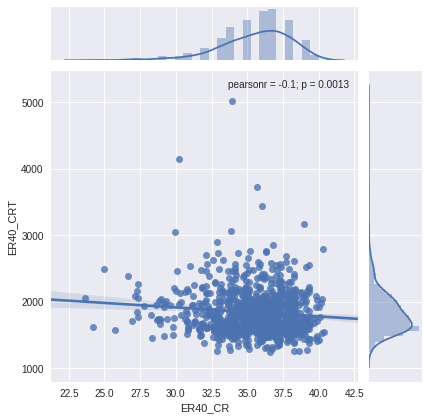

In [39]:
# Test for normality
x = data_emot_EmoRec.ER40_CR.dropna()
y = data_emot_EmoRec.ER40_CRT.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['ER40_CR','ER40_CRT'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="ER40_CR", y="ER40_CRT",data=data_emot_EmoRec.dropna(),kind="reg",x_jitter=.4);

- ### Instrument: Negative Affect

    - __Sadness_Unadj__: *Sadness is a concept within the Negative Affect subdomain of Emotion. Sadness is distinguished by low levels of positive affect and comprised of symptoms that are primarily affective (poor mood) and cognitive (negative perceptions of self, the world, and the future) indicators of depression. The NIH Toolbox Sadness Survey is a CAT comprised of items from the PROMIS Depression Item Bank.*
    
    - __FearAffect_Unadj__: *Fear is a concept within the Negative Affect subdomain of Emotion. Fear is best characterized by symptoms of anxiety that reflect autonomic arousal and perceptions of threat. The NIH Toolbox Fear-Affect Survey is a CAT comprised of items from the PROMIS Anxiety Item Bank. It assesses self-reported fear and anxious misery.*
    
    - __FearSomat_Unadj__:*Fear is a concept within the Negative Affect subdomain of Emotion. Fear is best characterized by symptoms of anxiety that reflect autonomic arousal and perceptions of threat. The NIH Toolbox Fear-Somatic Arousal Survey is a 6-item calibrated scale comprised of items from the Mood and Anxiety Symptom Questionnaire. It assesses somatic symptoms related to arousal.*
    
    - __AngAffect_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*
    
    - __AngHostil_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*
    
    - __AngAggr_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*

In [45]:
behav_emot_NegAff = ["Sadness_Unadj","FearSomat_Unadj","FearAffect_Unadj",
                     "AngAggr_Unadj","AngHostil_Unadj","AngAffect_Unadj"]
data_emot_NegAff= data.get(behav_emot_NegAff)
data_emot_NegAff.describe()

Sadness_Unadj  FearSomat_Unadj  FearAffect_Unadj  AngAggr_Unadj  \
count     969.000000       969.000000        969.000000     969.000000   
mean       46.420124        51.935088         50.210010      52.006295   
std         8.018563         8.304480          8.058258       8.926732   
min        34.200000        40.100000         32.900000      43.400000   
25%        41.800000        45.300000         46.000000      43.400000   
50%        46.100000        51.700000         51.200000      51.600000   
75%        51.000000        57.400000         54.900000      58.400000   
max        78.100000        87.500000         84.900000      83.100000   

       AngHostil_Unadj  AngAffect_Unadj  
count       969.000000       969.000000  
mean         50.388958        47.908566  
std           8.572497         8.397202  
min          36.600000        28.600000  
25%          43.600000        42.900000  
50%          50.600000        48.200000  
75%          56.900000        53.200000  
max          74.000000        85.400000

Shapiro-test


DF  Test Statistic       p-value
Sadness_Unadj     968        0.959642  1.056106e-15
FearSomat_Unadj   968        0.957648  4.012003e-16
FearAffect_Unadj  968        0.979296  1.652530e-10
AngAggr_Unadj     968        0.860842  1.998375e-28
AngHostil_Unadj   968        0.973148  2.151712e-12
AngAffect_Unadj   968        0.987625  2.710011e-07

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


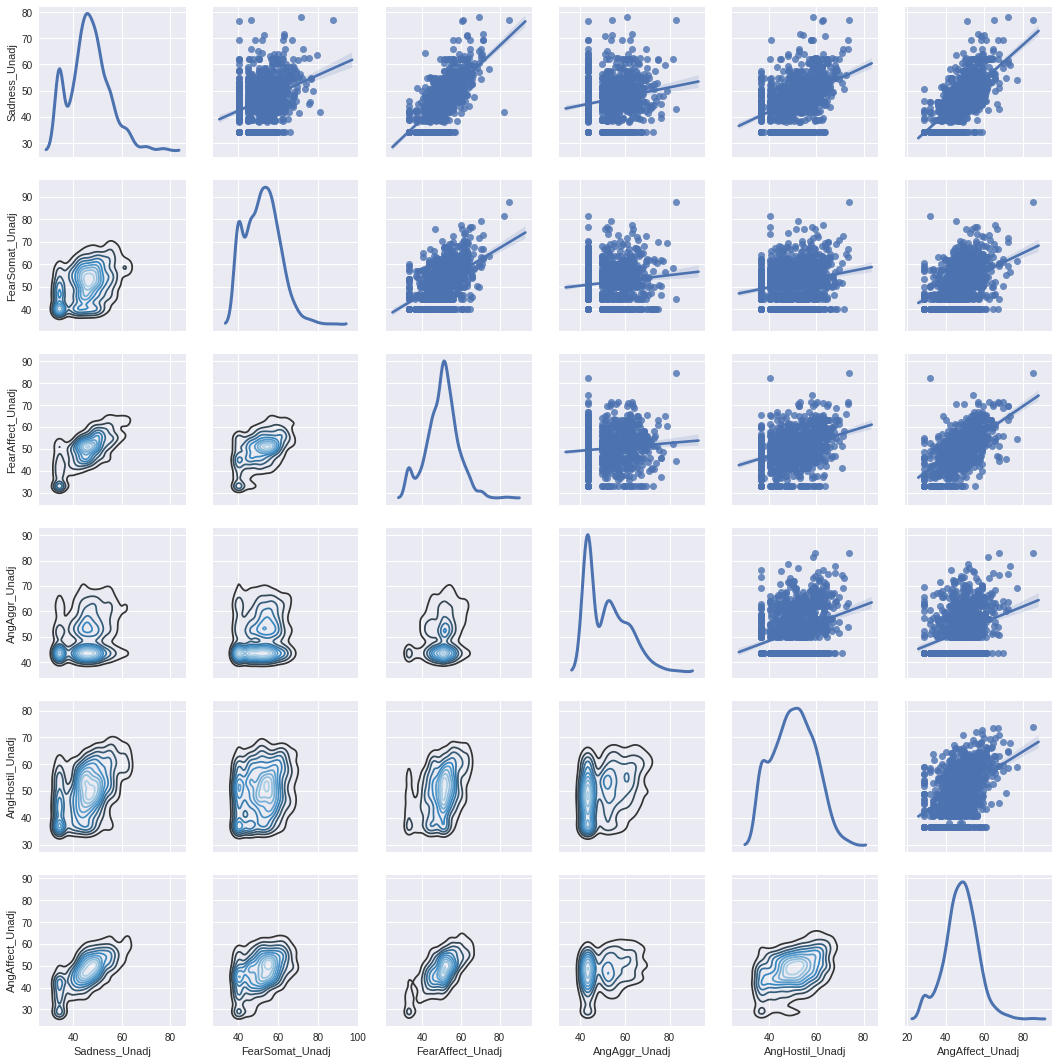

In [41]:
# Test for normality
x = data_emot_NegAff.Sadness_Unadj.dropna()
y = data_emot_NegAff.FearSomat_Unadj.dropna()
z = data_emot_NegAff.FearAffect_Unadj.dropna()
u = data_emot_NegAff.AngAggr_Unadj.dropna()
v = data_emot_NegAff.AngHostil_Unadj.dropna()
w = data_emot_NegAff.AngAffect_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0],shapiro_results_w[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1],shapiro_results_w[1]]}
df = pd.DataFrame(dict_sw,index=['Sadness_Unadj','FearSomat_Unadj','FearAffect_Unadj',
                                 'AngAggr_Unadj','AngHostil_Unadj','AngAffect_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_NegAff.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

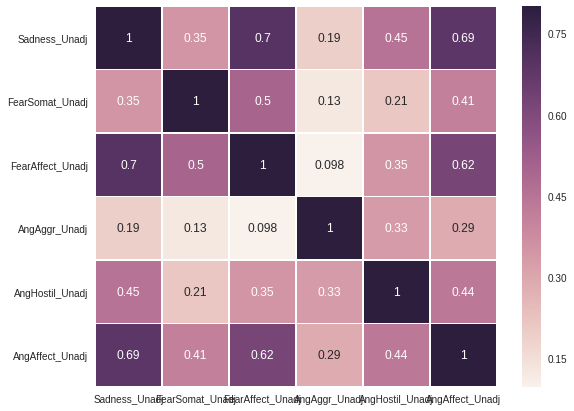

In [46]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_emot_NegAff.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

- ### Instrument: Psychological Well-being

    - **LifeSatisf_Unadj**: *Life Satisfaction is a concept within the Psychological Well-Being subdomain of Emotion. Life Satisfaction is one's cognitive evaluation of life experiences and is concerned with whether people like their lives or not. Life satisfaction includes both general (e.g., my life is going well) and domain-specific (e.g., I am satisfied with my family life) aspects. This self-report measure for adults (ages 18 and above) is a 10-item calibrated scale comprised of items from the Satisfaction with Life Scale  and the Students' Life Satisfaction Scale.  It assesses global feelings and attitudes about one's life.*
    
    - __MeanPurp_Unadj__: *Meaning and Purpose is a concept within the Psychological Well-Being subdomain of Emotion. Meaning and Purpose is characterized by the extent to which people feel their life matters or makes sense. This self-report measure for adults (ages 18 and above) is a CAT comprised of items from the Meaning in Life Questionnaire, the Life Engagement Test, the MHI, and the FACIT-Sp.*
    
    - __PosAffect_Unadj__: *Positive Affect is a concept within the Psychological Well-Being subdomain of Emotion. Positive Affect can be described as feelings that reflect a level of pleasurable engagement with the environment such as happiness, joy, excitement, enthusiasm, and contentment. This parent-report measure (for children ages 8-12) is a CAT comprised of items from the PANAS-X. It assesses both 
    

In [47]:
behav_emot_WellBein = ["LifeSatisf_Unadj","MeanPurp_Unadj","PosAffect_Unadj"]
data_emot_WellBein= data.get(behav_emot_WellBein)
data_emot_WellBein.describe()

LifeSatisf_Unadj  MeanPurp_Unadj  PosAffect_Unadj
count        969.000000      969.000000       969.000000
mean          54.214964       51.851290        50.040041
std            9.245036        8.841796         7.874815
min           23.700000       29.400000        21.900000
25%           48.000000       46.100000        44.700000
50%           55.000000       50.900000        50.200000
75%           60.100000       57.700000        54.700000
max           74.600000       71.600000        71.600000

Shapiro-test


DF  Test Statistic       p-value
LifeSatisf_Unadj  968        0.991829  3.384641e-05
MeanPurp_Unadj    968        0.988005  4.031163e-07
PosAffect_Unadj   968        0.984873  1.819461e-08

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


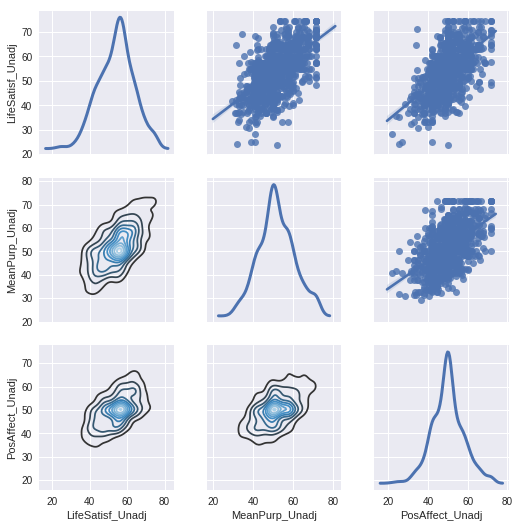

In [44]:
# Test for normality
x = data_emot_WellBein.LifeSatisf_Unadj.dropna()
y = data_emot_WellBein.MeanPurp_Unadj.dropna()
z = data_emot_WellBein.PosAffect_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1]]}
df = pd.DataFrame(dict_sw,index=['LifeSatisf_Unadj','MeanPurp_Unadj','PosAffect_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_WellBein.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

- ### Instrument: Social Relationships

    - __Friendship_Unadj__: *Companionship is a concept within the Social Relationships subdomain of Emotion. Companionship is characterized by self-reported perceptions of the availability of friends or companions with whom to interact or affiliate (i.e., friendship) and that one is alone, lonely or socially isolated from others (i.e., loneliness).  The NIH Toolbox Friendship Survey is a self-report measure for adults (ages 18 and above) comprised of 5 calibrated items.*
    
    - __Loneliness_Unadj__: *Companionship is a concept within the Social Relationships subdomain of Emotion. Companionship is characterized by self-reported perceptions of the availability of friends or companions with whom to interact or affiliate (i.e., friendship) and that one is alone, lonely or socially isolated from others (i.e., loneliness).  The NIH Toolbox Loneliness Survey is a self-report measure for adults (ages 18 and above) comprised of 8 calibrated items.*
    
    - __PercHostil_Unadj__: *Social Distress is a concept within the Social Relationships subdomain of Emotion. Social distress is the extent to which an individual perceives his/her daily social interactions as negative or distressing.  This can include aspects of perceived hostility (e.g., how often people argue with me, yell at me, or criticize me) and perceived rejection (e.g., how often people don't listen when I ask for help, or don't pay attention to me). The NIH Toolbox Perceived Hostility Survey is a self-report measure for children and adolescents (ages 8-17) comprised of 5 calibrated items.*
    
    - __PercReject_Unadj__: *Social Distress is a concept within the Social Relationships subdomain of Emotion. Social distress is the extent to which an individual perceives his/her daily social interactions as negative or distressing.  This can include aspects of perceived hostility (e.g., how often people argue with me, yell at me, or criticize me) and perceived rejection (e.g., how often people don't listen when I ask for help, or don't pay attention to me). The NIH Toolbox Perceived Rejection Survey is a self-report measure for children and adolescents (ages 8-17) comprised of 5 calibrated items.*
    
    - __EmotSupp_Unadj__: *Social Support is a concept within the Social Relationships subdomain of Emotion. Perceived social support is the extent to which an individual views his/her social relationships as available to provide aid in times of need or when problems arise (Cohen, 2004).   This includes emotional/informational types of perceived social support for children and adolescents. Emotional Support refers to the perception that people in one's social network are available to listen to one's problems with empathy, caring and understanding, and Informational Support refers to the perception that people in one's social network are available to provide information or advice needed to solve problems that arise.  This self-report measure for children and adolescents (ages 8-17) is a 7-item calibrated scale.*
    
    - __InstruSupp_Unadj__: *Social Support is a concept within the Social Relationships subdomain of Emotion. Perceived social support is the extent to which an individual views his/her social relationships as available to provide aid in times of need or when problems arise. This includes instrumental and emotional/informational types of perceived social support. Instrumental Support refers to the perception that people in one's social network are available to provide material or functional aid in completing daily tasks (such as making meals or providing transportation) if needed. This self-report measure for adults (ages 18 and above) is an 8-item calibrated scale.*

In [48]:
behav_emot_SocRel = ["Friendship_Unadj","Loneliness_Unadj","PercHostil_Unadj",
                     "PercReject_Unadj","EmotSupp_Unadj","InstruSupp_Unadj"]
data_emot_SocRel= data.get(behav_emot_SocRel)
data_emot_SocRel.describe()

Friendship_Unadj  Loneliness_Unadj  PercHostil_Unadj  PercReject_Unadj  \
count        969.000000        969.000000        969.000000        969.000000   
mean          50.337255         51.116099         48.624252         48.747678   
std            9.186610          8.845163          8.670738          9.036844   
min           20.800000         37.600000         33.500000         35.900000   
25%           44.600000         44.900000         43.700000         40.700000   
50%           49.800000         52.000000         49.300000         50.000000   
75%           56.200000         56.200000         53.900000         54.100000   
max           66.500000         82.900000         85.600000         85.300000   

       EmotSupp_Unadj  InstruSupp_Unadj  
count      968.000000        968.000000  
mean        51.301033         48.120764  
std          9.795881          9.087598  
min         15.900000         22.100000  
25%         44.800000         42.500000  
50%         51.800000         46.900000  
75%         62.500000         54.325000  
max         62.500000         62.900000

Shapiro-test


DF  Test Statistic       p-value
Friendship_Unadj  968        0.980982  6.250830e-10
Loneliness_Unadj  968        0.956666  2.520746e-16
PercHostil_Unadj  968        0.970053  3.086238e-13
PercReject_Unadj  968        0.939084  1.733355e-19
EmotSupp_Unadj    967        0.916510  1.126354e-22
InstruSupp_Unadj  967        0.967365  6.478880e-14

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


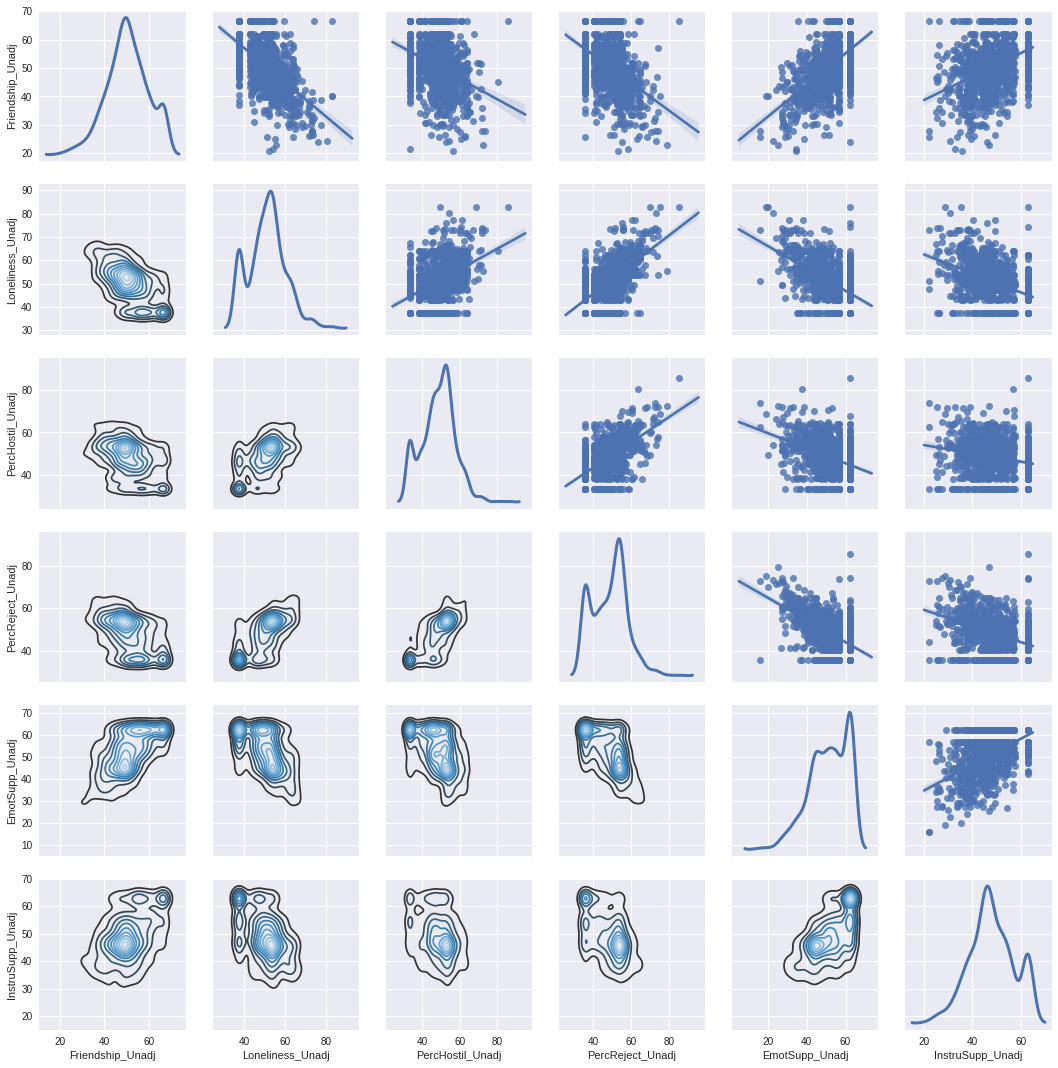

In [46]:
# Test for normality
x = data_emot_SocRel.Friendship_Unadj.dropna()
y = data_emot_SocRel.Loneliness_Unadj.dropna()
z = data_emot_SocRel.PercHostil_Unadj.dropna()
u = data_emot_SocRel.PercReject_Unadj.dropna()
v = data_emot_SocRel.EmotSupp_Unadj.dropna()
w = data_emot_SocRel.InstruSupp_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0],shapiro_results_w[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1],shapiro_results_w[1]]}
df = pd.DataFrame(dict_sw,index=['Friendship_Unadj','Loneliness_Unadj','PercHostil_Unadj',
                                 'PercReject_Unadj','EmotSupp_Unadj','InstruSupp_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_SocRel.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

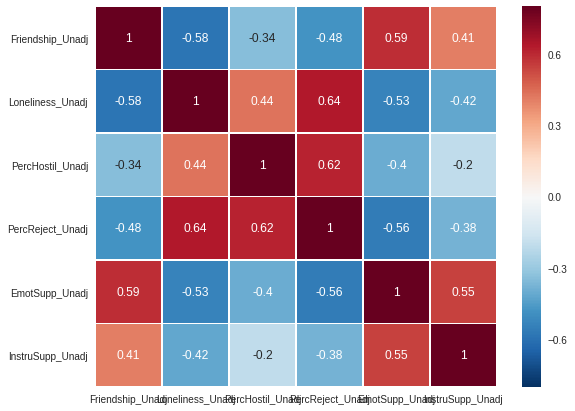

In [49]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_emot_SocRel.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

- ### Instrument: Stress and Self Efficacy

    - __PercStress_Unadj__: *Perceived Stress is a concept within the Stress & Self-Efficacy subdomain of Emotion. Perceived Stress is defined by individual perceptions about the nature of events and their relationship to the values and coping resources of an individual. This self-report measure for adults (ages 18 and above) is a CAT comprised of items from the Perceived Stress Scale-10. . It assesses how unpredictable, uncontrollable, and overloading respondents find their lives.*
    
    - __SelfEff_Unadj__: *Self-Efficacy is a concept within the Stress & Self-Efficacy subdomain of Emotion. Self-Efficacy can be described as a person's belief in their capacity to manage their functioning and have control over meaningful events. This self-report measure for adults (ages 18 and above) is a CAT comprised of items modified from the General Self-Efficacy Scale (Schwarzer). It assesses respondents' sense of global self-efficacy.*

In [50]:
behav_emot_SelfEff = ["PercStress_Unadj","SelfEff_Unadj"]
data_emot_SelfEff= data.get(behav_emot_SelfEff)
data_emot_SelfEff.describe()

PercStress_Unadj  SelfEff_Unadj
count        969.000000     969.000000
mean          48.296285      50.763777
std            9.105382       8.385369
min           22.400000      24.100000
25%           42.600000      45.500000
50%           48.000000      49.400000
75%           54.100000      56.400000
max           80.500000      68.400000

Shapiro-test


DF  Test Statistic       p-value
PercStress_Unadj  968        0.996380  2.438972e-02
SelfEff_Unadj     968        0.984389  1.165820e-08

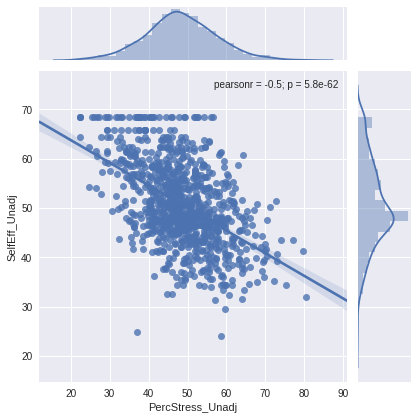

In [49]:
# Test for normality
x = data_emot_SelfEff.PercStress_Unadj.dropna()
y = data_emot_SelfEff.SelfEff_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['PercStress_Unadj','SelfEff_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="PercStress_Unadj", y="SelfEff_Unadj",data=data_emot_SelfEff.dropna(),kind="reg");

In [51]:
behav_emot = behav_emot_EmoRec+behav_emot_NegAff+behav_emot_WellBein+behav_emot_SocRel+behav_emot_SelfEff
data_emot= data.get(behav_emot)
data_emot.describe()

ER40_CR     ER40_CRT  Sadness_Unadj  FearSomat_Unadj  \
count  964.000000   964.000000     969.000000       969.000000   
mean    35.537344  1842.682573      46.420124        51.935088   
std      2.549134   331.810456       8.018563         8.304480   
min     24.000000  1248.000000      34.200000        40.100000   
25%     34.000000  1614.500000      41.800000        45.300000   
50%     36.000000  1780.000000      46.100000        51.700000   
75%     37.000000  2010.000000      51.000000        57.400000   
max     40.000000  5020.000000      78.100000        87.500000   

       FearAffect_Unadj  AngAggr_Unadj  AngHostil_Unadj  AngAffect_Unadj  \
count        969.000000     969.000000       969.000000       969.000000   
mean          50.210010      52.006295        50.388958        47.908566   
std            8.058258       8.926732         8.572497         8.397202   
min           32.900000      43.400000        36.600000        28.600000   
25%           46.000000      43.400000        43.600000        42.900000   
50%           51.200000      51.600000        50.600000        48.200000   
75%           54.900000      58.400000        56.900000        53.200000   
max           84.900000      83.100000        74.000000        85.400000   

       LifeSatisf_Unadj  MeanPurp_Unadj  PosAffect_Unadj  Friendship_Unadj  \
count        969.000000      969.000000       969.000000        969.000000   
mean          54.214964       51.851290        50.040041         50.337255   
std            9.245036        8.841796         7.874815          9.186610   
min           23.700000       29.400000        21.900000         20.800000   
25%           48.000000       46.100000        44.700000         44.600000   
50%           55.000000       50.900000        50.200000         49.800000   
75%           60.100000       57.700000        54.700000         56.200000   
max           74.600000       71.600000        71.600000         66.500000   

       Loneliness_Unadj  PercHostil_Unadj  PercReject_Unadj  EmotSupp_Unadj  \
count        969.000000        969.000000        969.000000      968.000000   
mean          51.116099         48.624252         48.747678       51.301033   
std            8.845163          8.670738          9.036844        9.795881   
min           37.600000         33.500000         35.900000       15.900000   
25%           44.900000         43.700000         40.700000       44.800000   
50%           52.000000         49.300000         50.000000       51.800000   
75%           56.200000         53.900000         54.100000       62.500000   
max           82.900000         85.600000         85.300000       62.500000   

       InstruSupp_Unadj  PercStress_Unadj  SelfEff_Unadj  
count        968.000000        969.000000     969.000000  
mean          48.120764         48.296285      50.763777  
std            9.087598          9.105382       8.385369  
min           22.100000         22.400000      24.100000  
25%           42.500000         42.600000      45.500000  
50%           46.900000         48.000000      49.400000  
75%           54.325000         54.100000      56.400000  
max           62.900000         80.500000      68.400000

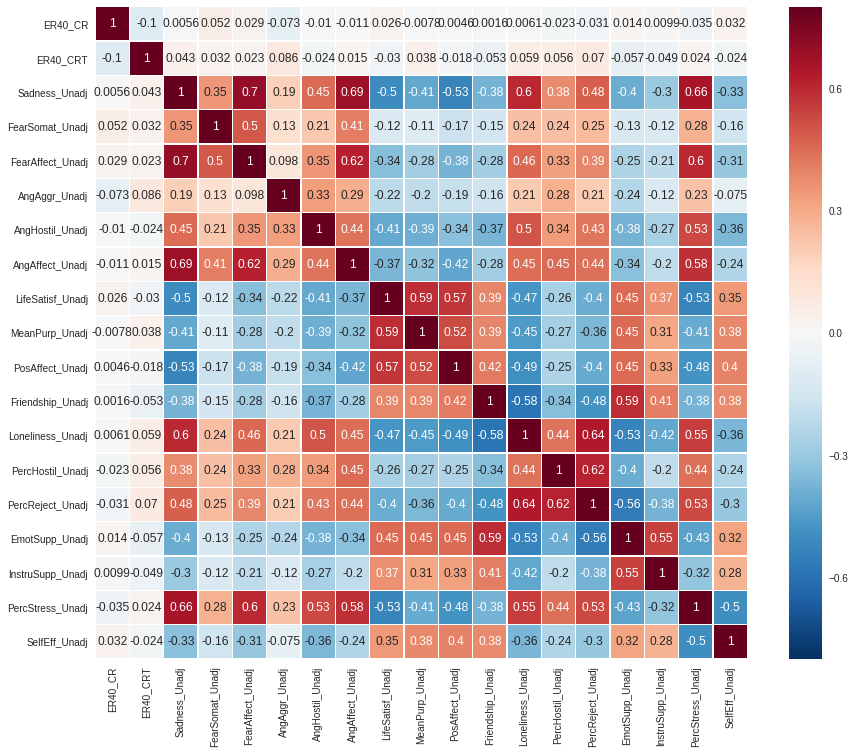

In [52]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data_emot.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Motor Domain

- ### Instrument: Endurance (2 minute walk test)

    - __Endurance_Unadj__: *This test is adapted from the American Thoracic Society’s 6-Minute Walk Test Protocol. This test measures sub-maximal cardiovascular endurance by recording the distance that the participant is able to walk on a 50-foot (out and back) course in 2 minutes. The participant’s raw score is the distance in feet and inches walked in 2 minutes. The test overall takes approximately 4 minutes to administer (with instructions and practice). This test is recommended for ages 3-85.*

In [53]:
behav_mot_Endur = ["Endurance_Unadj"]
data_mot_Endur= data.get(behav_mot_Endur)
data_mot_Endur.describe()

Endurance_Unadj
count       969.000000
mean        109.022105
std          12.041593
min          78.610000
25%         101.030000
50%         107.720000
75%         116.570000
max         145.170000

Shapiro-test


DF  Test Statistic   p-value
Endurance_Unadj  968        0.992159  0.000052

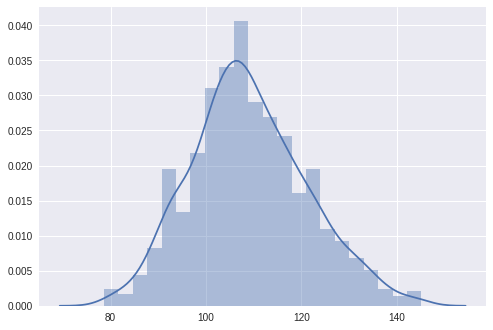

In [54]:
x = data_mot_Endur.Endurance_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Endurance_Unadj']))

# Plot distribution
sns.distplot(data_mot_Endur.Endurance_Unadj.dropna().as_matrix());

- ### Instrument: Locomotion

    - __GaitSpeed_Comp__ : *This test is adapted from the 4-meter walk test in the Short Physical Performance Battery. Participants are asked to walk a short distance (four meters) at their usual pace. Participants complete one practice and then two timed trials. Raw scores are recorded as the time in seconds required to walk 4 meters on each of the two trials, with the better trial used for scoring. The test takes approximately three minutes to administer (including instructions and practice). This test is recommended for ages 7-85. Computed scores are in meters per second.*

In [56]:
behav_mot_Locom = ["GaitSpeed_Comp"]
data_mot_Locom= data.get(behav_mot_Locom)
data_mot_Locom.describe()

GaitSpeed_Comp
count      970.000000
mean         1.324670
std          0.195285
min          0.790000
25%          1.180000
50%          1.320000
75%          1.450000
max          2.000000

Shapiro-test


DF  Test Statistic   p-value
GaitSpeed_Comp  969        0.991576  0.000024

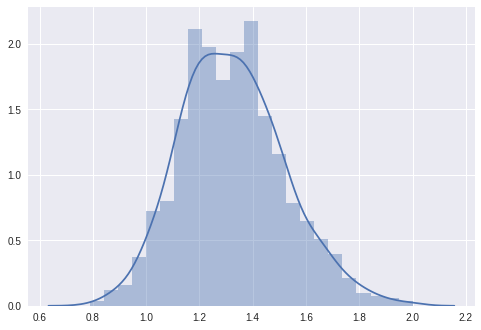

In [57]:
x = data_mot_Locom.GaitSpeed_Comp.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['GaitSpeed_Comp']))

# Plot distribution
sns.distplot(data_mot_Locom.GaitSpeed_Comp.dropna().as_matrix());

- ### Instrument: Dexterity (9-hole Pegboard)

    - __Dexterity_Unadj__: *This simple test of manual dexterity records the time required for the participant to accurately place and remove 9 plastic pegs into a plastic pegboard. The protocol includes 1 practice and 1 timed trial with each hand. Raw scores are recorded as time in seconds that it takes the participant to complete the task with the dominant hand. The test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [58]:
behav_mot_Dexte = ["Dexterity_Unadj"]
data_mot_Dexte= data.get(behav_mot_Dexte)
data_mot_Dexte.describe()

Dexterity_Unadj
count       970.000000
mean        112.447814
std          10.866102
min          81.530000
25%         104.900000
50%         112.190000
75%         120.317500
max         148.670000

Shapiro-test


DF  Test Statistic  p-value
Dexterity_Unadj  969        0.997475   0.1395

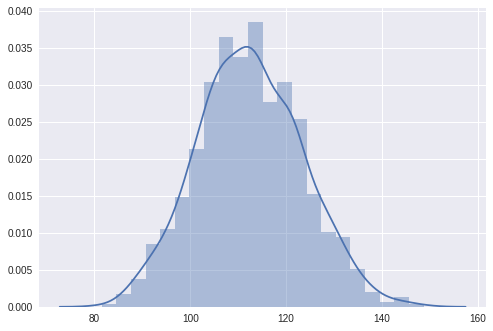

In [59]:
x = data_mot_Dexte.Dexterity_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Dexterity_Unadj']))

# Plot distribution
sns.distplot(data_mot_Dexte.Dexterity_Unadj.dropna().as_matrix());

- ### Instrument: Strength (Grip Strength Dynamometry)

    - __Strength_Unadj__:*This protocol is adapted from the grip strength testing protocol of the American Society of Hand Therapy. Participants are seated in a chair with their feet touching the ground. With the elbow bent to 90 degrees and the arm against the trunk, wrist at neutral, participants squeeze the Jamar Plus Digital dynamometer as hard as they can for a count of three. The dynamometer provides a digital reading of force in pounds. A practice trial at less than full force and 1 test trial are completed with each hand.
The Grip Strength Test provides a score for each hand, with the primary Toolbox score being the number of pounds of force the participant was able to generate using his/her dominant hand.
The test takes approximately 3 minutes to administer and is recommended for ages 3-85.*

In [60]:
behav_mot_Stren = ["Strength_Unadj"]
data_mot_Stren= data.get(behav_mot_Stren)
data_mot_Stren.describe()

Strength_Unadj
count      969.000000
mean       116.464737
std         11.419426
min         55.290000
25%        107.620000
50%        115.090000
75%        124.270000
max        154.010000

Shapiro-test


DF  Test Statistic       p-value
Strength_Unadj  968        0.975877  1.353265e-11

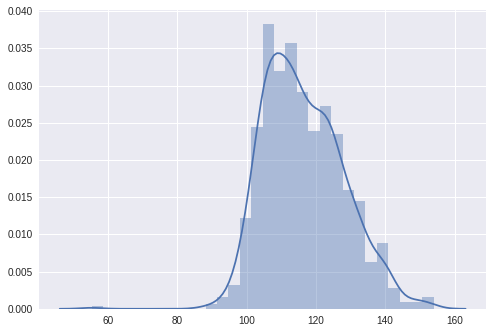

In [61]:
x = data_mot_Stren.Strength_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Strength_Unadj']))

# Plot distribution
sns.distplot(data_mot_Stren.Strength_Unadj.dropna().as_matrix());

In [63]:
behav_mot = behav_mot_Endur+behav_mot_Locom+behav_mot_Dexte+behav_mot_Stren
data_mot = data.get(behav_mot)
data_mot.describe()

Endurance_Unadj  GaitSpeed_Comp  Dexterity_Unadj  Strength_Unadj
count       969.000000      970.000000       970.000000      969.000000
mean        109.022105        1.324670       112.447814      116.464737
std          12.041593        0.195285        10.866102       11.419426
min          78.610000        0.790000        81.530000       55.290000
25%         101.030000        1.180000       104.900000      107.620000
50%         107.720000        1.320000       112.190000      115.090000
75%         116.570000        1.450000       120.317500      124.270000
max         145.170000        2.000000       148.670000      154.010000

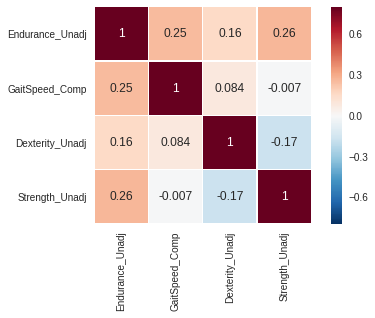

In [64]:
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(data_mot.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Sensory Domain

- ### Instrument: Audition (Words in Noise)

    - __Noise_Comp__: *This automated audiometric test measures hearing thresholds at six different frequencies (.5, 1, 2, 4, 6 and 8 kHz), separately in the left and right ears. On each trial, the participant’s task is to detect whether a pure tone was presented via headphones by answering yes (tone heard) or no (tone not heard). This test takes approximately nine minutes to administer and is recommended for ages 6-85. Based on the participant’s responses, the computer software automatically scores each trial at each of the frequencies for left and right ears, determining the hearing threshold (in decibels)—that is, the level below which the participant cannot hear the tone.To provide a unifying score for Toolbox users, a single hearing metric is provided that is commonly used: a Pure Tone Average (PTA). This is calculated by averaging the threshold scores of 1, 2 and 4 kHz frequencies. Scores for each ear are calculated, with the PTA from the better ear reported as the primary score (i.e., the ear with the lower PTA).*

In [65]:
behav_sens_Audi = ["Noise_Comp"]
data_sens_Audi= data.get(behav_sens_Audi)
data_sens_Audi.describe()

Noise_Comp
count  944.000000
mean    -5.521186
std     30.766597
min    -99.000000
25%      3.600000
50%      4.400000
75%      5.200000
max     14.000000

Shapiro-test


DF  Test Statistic  p-value
Noise_Comp  943        0.379602      0.0

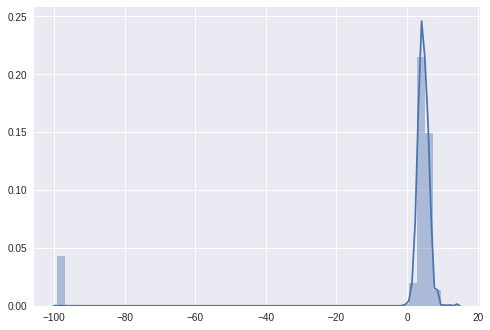

In [66]:
x = data_sens_Audi.Noise_Comp.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Noise_Comp']))

# Plot distribution
sns.distplot(data_sens_Audi.Noise_Comp.dropna().as_matrix());

- ### Instrument: Olfaction (Odor Identification Test)

    - __Odor_Unadj__: *Test the ability to detect odors, to recognize and discriminate odor qualities, and to identify the sources of odors in our world.Age 10+*

In [67]:
behav_sens_Olfa = ["Odor_Unadj"]
data_sens_Olfa = data.get(behav_sens_Olfa)
data_sens_Olfa.describe()

Odor_Unadj
count  968.000000
mean   111.005816
std      8.957944
min     82.740000
25%    101.120000
50%    108.790000
75%    122.250000
max    122.250000

Shapiro-test


DF  Test Statistic       p-value
Odor_Unadj  967        0.836056  2.125936e-30

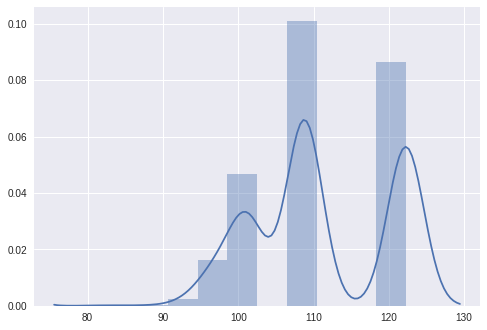

In [68]:
x = data_sens_Olfa.Odor_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Odor_Unadj']))

# Plot distribution
sns.distplot(data_sens_Olfa.Odor_Unadj.dropna().as_matrix());

- ### Instrument: Pain (Pain Intensity and Interference Surveys)

    - __PainIntens_RawScore__: *This measure consists of a single item measuring immediate (i.e., acute) pain in adults. It asks a participant to rate level of pain experienced “over the last seven days.” It takes less than one minute to administer and is recommended for ages 18-85.Scoring Process: The single item is simply scored on a 0-10 scale, with 0 representing no pain, and 10 representing the “worst imaginable pain.” No derived scores are available.* (Excluded currently due to glich in the Toolbox data download)
    
    - __PainInterf_Tscore__: *This brief self-report scale measures the degree to which pain interferes with other activities in life in adults. Pain interference items were developed as part of the NIH PROMIS. This measure is administered as a CAT and takes approximately three minutes. It is recommended for ages 18-85. Each item administered has a 5-point scale with options ranging from “not at all” to “very much” on questions about how much pain interferes with aspects of one’s life. The survey is scored, and while no Toolbox norms are available for this measure, the scores are converted to general T-scores based on the PROMIS sample to whom this test was given.*

In [69]:
behav_sens_Pain = ["PainInterf_Tscore"]
data_sens_Pain = data.get(behav_sens_Pain)
data_sens_Pain.describe()

PainInterf_Tscore
count         969.000000
mean           45.761507
std             7.602727
min            38.600000
25%            38.600000
50%            45.900000
75%            52.200000
max            75.300000

Shapiro-test


DF  Test Statistic       p-value
PainInterf_Tscore  968        0.836056  2.125936e-30

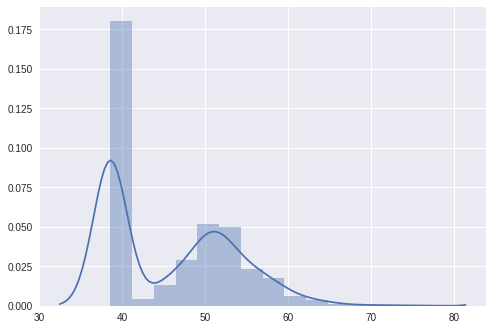

In [70]:
# Test for normality
x = data_sens_Pain.PainInterf_Tscore.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['PainInterf_Tscore'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_Pain.PainInterf_Tscore.dropna().as_matrix());

- ### Instrument: Taste (Taste Intensity Test)

    - __Taste_Unadj__: *NIH Toolbox Regional Taste Intensity Age 12+ Unadjusted Scale Score. Measures perceived intensity of quinine and salt administered in liquid solutions. Participants rate intensity by touching the screen at any point on the scale from "Strongest imaginable" to "No sensation".*

In [76]:
behav_sens_Taste = ["Taste_Unadj"]
data_sens_Taste = data.get(behav_sens_Taste)
data_sens_Taste.describe()

Taste_Unadj
count   966.000000
mean     95.092464
std      14.522400
min      56.350000
25%      84.070000
50%      95.360000
75%     104.660000
max     134.650000

Shapiro-test


DF  Test Statistic       p-value
Taste_Unadj  965        0.836056  2.125936e-30

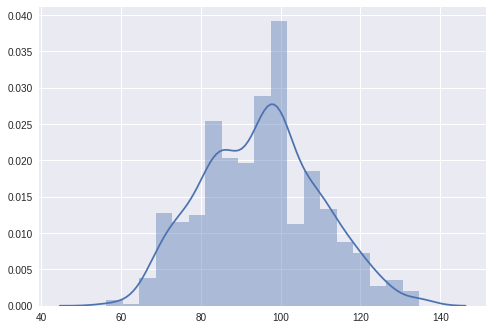

In [77]:
# Test for normality
x = data_sens_Taste.Taste_Unadj.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['Taste_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_Taste.Taste_Unadj.dropna().as_matrix());

- ### Instrument: Contrast Sensitivity (Mars Contrast Sensitivity)

    - __Mars_Final__: *Contrast sensitivity is measured using the Mars Contrast Sensitivity Test (Arditi et al. 2005), a brief, valid and reliable measure that improves upon the traditional Pelli-Robson measure (Dougherty et al. 2005; Haymes et al. 2006; Thayaparan et al. 2007).*

In [78]:
behav_sens_ContrSens = ["Mars_Final"]
data_sens_ContrSens = data.get(behav_sens_ContrSens)
data_sens_ContrSens.describe()

Mars_Final
count  962.000000
mean     1.794272
std      0.065747
min      1.080000
25%      1.760000
50%      1.800000
75%      1.840000
max      1.920000

Shapiro-test


DF  Test Statistic       p-value
Mars_Final  961        0.836056  2.125936e-30

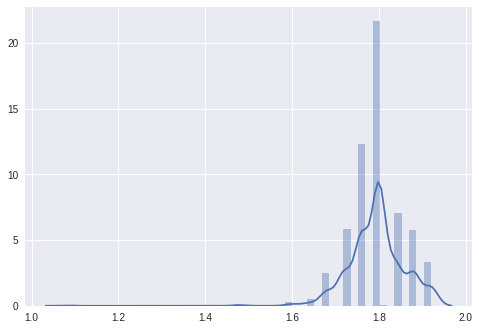

In [79]:
# Test for normality
x = data_sens_ContrSens.Mars_Final.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['Mars_Final'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_ContrSens.Mars_Final.dropna().as_matrix());

In [82]:
behav_sens =behav_sens_Pain+behav_sens_Taste+behav_sens_Olfa+behav_sens_ContrSens
data_sens= data.get(behav_sens)
data_sens.describe()

PainInterf_Tscore  Taste_Unadj  Odor_Unadj  Mars_Final
count         969.000000   966.000000  968.000000  962.000000
mean           45.761507    95.092464  111.005816    1.794272
std             7.602727    14.522400    8.957944    0.065747
min            38.600000    56.350000   82.740000    1.080000
25%            38.600000    84.070000  101.120000    1.760000
50%            45.900000    95.360000  108.790000    1.800000
75%            52.200000   104.660000  122.250000    1.840000
max            75.300000   134.650000  122.250000    1.920000

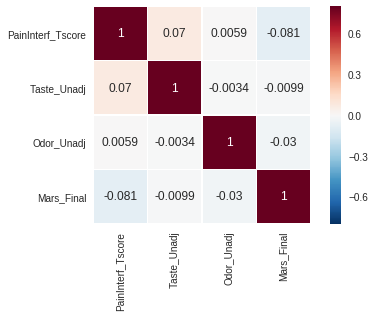

In [83]:
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(data_sens.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Personality domain

- ### Instrument: Five Factor Model (NEO-FFI)

    - __NEOFAC_A__: *Personality Agreeableness*
    - __NEOFAC_O__: *Personality Openness*
    - __NEOFAC_C__: *Personality Conscientiousness*
    - __NEOFAC_N__: *Personality Neuroticism*
    - __NEOFAC_E__: *Personality Extroversion*

In [84]:
behav_perso= ["NEOFAC_A","NEOFAC_O","NEOFAC_C",
                     "NEOFAC_N","NEOFAC_E"]
data_perso= data.get(behav_perso)
data_perso.describe()

NEOFAC_A    NEOFAC_O    NEOFAC_C    NEOFAC_N    NEOFAC_E
count  965.000000  965.000000  965.000000  965.000000  965.000000
mean    31.843523   28.089119   34.539896   16.618653   30.678756
std      5.059949    6.193151    5.900604    7.161856    5.986535
min     13.000000    9.000000   12.000000    0.000000   11.000000
25%     29.000000   24.000000   31.000000   12.000000   27.000000
50%     32.000000   27.000000   35.000000   16.000000   31.000000
75%     35.000000   32.000000   38.000000   21.000000   35.000000
max     45.000000   45.000000   48.000000   43.000000   47.000000

Shapiro-test


DF  Test Statistic       p-value
NEOFAC_A  964        0.991357  1.951373e-05
NEOFAC_O  964        0.990121  4.422365e-06
NEOFAC_C  964        0.988764  9.582980e-07
NEOFAC_N  964        0.987155  1.763407e-07
NEOFAC_E  964        0.992050  4.679194e-05

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


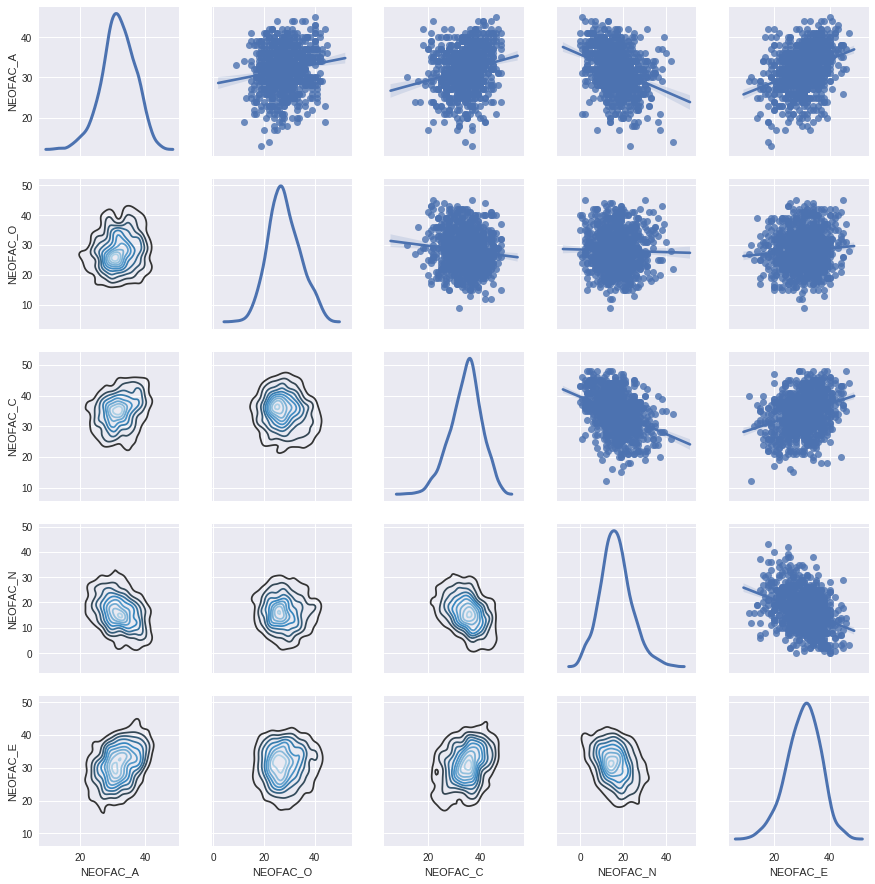

In [77]:
# Test for normality
x = data_perso.NEOFAC_A.dropna()
y = data_perso.NEOFAC_O.dropna()
z = data_perso.NEOFAC_C.dropna()
u = data_perso.NEOFAC_N.dropna()
v = data_perso.NEOFAC_E.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1]]}
df = pd.DataFrame(dict_sw,index=['NEOFAC_A','NEOFAC_O','NEOFAC_C',
                                 'NEOFAC_N','NEOFAC_E'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_perso.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

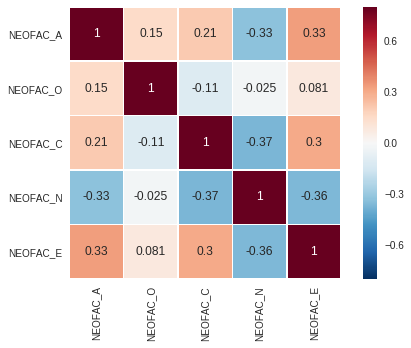

In [85]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data_perso.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Psychiatric, Substance Abuse, and Life Function

- ### Instrument: Achenbach Adult Self-Report, Syndrome Scales and DSM-Oriented

    - __ASR_anxdp_t__: *ASR Anxious/Depressed Gender and Age Adjusted Percentile*
    - __ASR_wthdp_t__: *ASR Withdrawn Gender and Age Adjusted Percentile*
    - __ASR_som_t__: *ASR Somatic Complaints Gender and Age Adjusted Percentile*
    - __ASR_tho_t__: *ASR Thought Problems Gender and Age Adjusted Percentile*
    - __ASR_att_t__: *Personality Extroversion*

In [88]:
behav_psych= ['ASR_Anxd_Pct','ASR_Witd_Pct','ASR_Soma_Pct',
              'ASR_Thot_Pct','ASR_Attn_Pct','ASR_Aggr_Pct','ASR_Rule_Pct',
              'ASR_Intr_Pct','ASR_Intn_T','ASR_Extn_T','DSM_Depr_Pct',
             'DSM_Anxi_Pct','DSM_Somp_Pct','DSM_Avoid_Pct','DSM_Adh_Pct','DSM_Antis_Pct']
data_psych= data.get(behav_psych)

In [89]:
data_psych.describe()

ASR_Anxd_Pct  ASR_Witd_Pct  ASR_Soma_Pct  ASR_Thot_Pct  ASR_Attn_Pct  \
count    964.000000    964.000000    964.000000    964.000000    964.000000   
mean      53.836100     53.702282     53.909751     53.793568     54.854772   
std        6.190646      6.015172      5.970605      5.810965      5.402556   
min       50.000000     50.000000     50.000000     50.000000     50.000000   
25%       50.000000     50.000000     50.000000     50.000000     50.000000   
50%       51.000000     51.000000     51.000000     51.000000     54.000000   
75%       56.000000     55.000000     56.000000     55.000000     58.000000   
max       94.000000     96.000000     98.000000     85.000000     94.000000   

       ASR_Aggr_Pct  ASR_Rule_Pct  ASR_Intr_Pct  ASR_Intn_T  ASR_Extn_T  \
count    964.000000    964.000000    964.000000  964.000000  964.000000   
mean      52.715768     53.954357     53.771784   48.481328   48.900415   
std        4.259754      5.240825      5.538855   10.614684    8.921746   
min       50.000000     50.000000     50.000000   30.000000   30.000000   
25%       50.000000     50.000000     50.000000   40.750000   43.000000   
50%       51.000000     51.000000     51.000000   47.000000   49.000000   
75%       53.000000     56.000000     56.000000   56.000000   55.000000   
max       93.000000     89.000000     78.000000   97.000000   93.000000   

       DSM_Depr_Pct  DSM_Anxi_Pct  DSM_Somp_Pct  DSM_Avoid_Pct  DSM_Adh_Pct  \
count    964.000000    964.000000    964.000000     964.000000   964.000000   
mean      53.993776     53.239627     53.979253      54.296680    54.813278   
std        5.792712      5.148637      5.808611       6.080214     5.779290   
min       50.000000     50.000000     50.000000      50.000000    50.000000   
25%       50.000000     50.000000     50.000000      50.000000    50.000000   
50%       51.000000     51.000000     51.000000      51.000000    52.000000   
75%       56.250000     54.000000     57.000000      57.000000    59.000000   
max       87.000000     80.000000     97.000000      87.000000    98.000000   

       DSM_Antis_Pct  
count     964.000000  
mean       53.132780  
std         4.892723  
min        50.000000  
25%        50.000000  
50%        51.000000  
75%        54.000000  
max        89.000000

In [ ]:
# Test for normality
x = data_psych.ASR_Anxd_Pct.dropna()
y = data_psych.ASR_Witd_Pct.dropna()
z = data_psych.ASR_Soma_Pct.dropna()
u = data_psych.ASR_Thot_Pct.dropna()
v = data_psych.ASR_Attn_Pct.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1]]}
df = pd.DataFrame(dict_sw,index=['ASR_Anxd_Pct','ASR_Witd_Pct','ASR_Soma_Pct',
                                 'ASR_Thot_Pct','ASR_Attn_Pct'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_psych.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

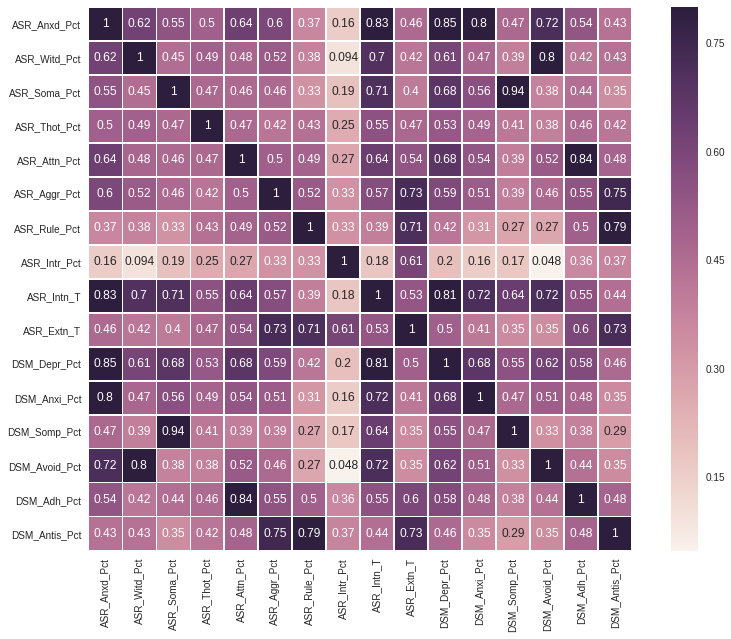

In [90]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data_psych.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# All Domain correlation matrix

### Raw matrix 

In [91]:
data_all_pheno = pd.concat([data.get(["Subject"]),data_demog, data_physio, data_cog, data_emot,data_sens, data_mot, data_perso,data_psych], axis=1)
# save to csv
data_all_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean.csv'),index=False)

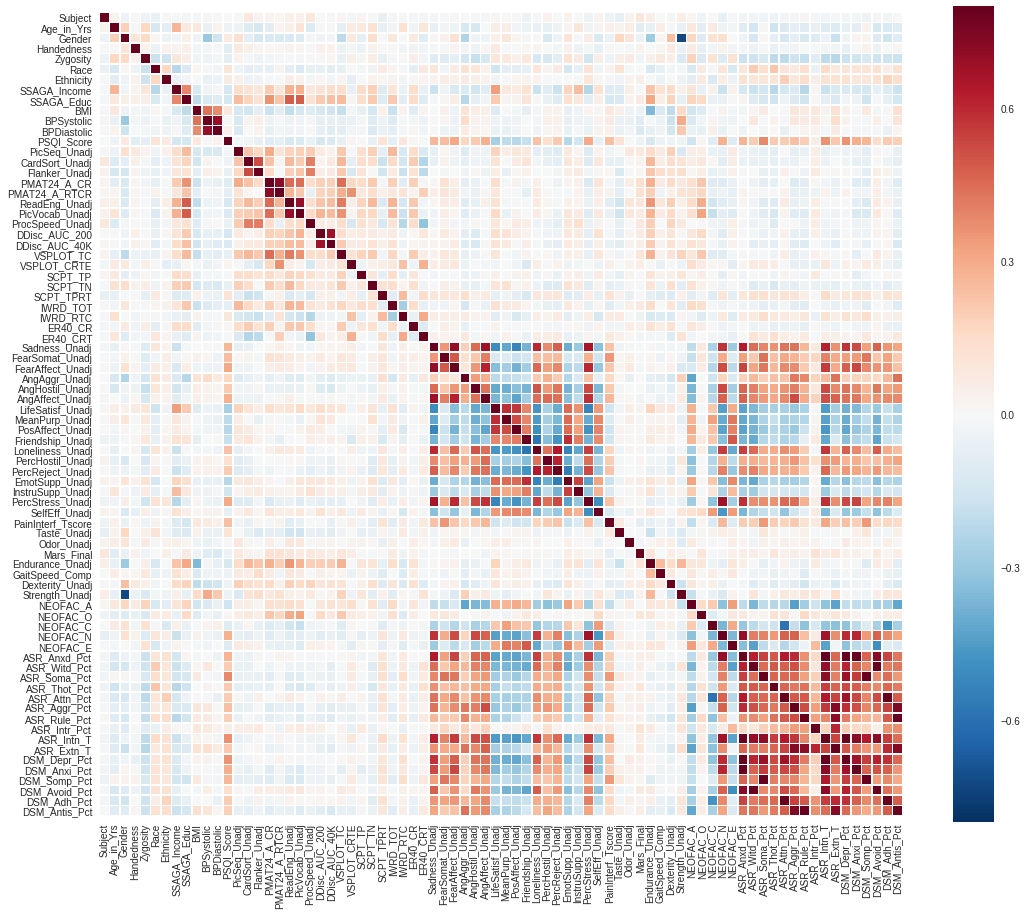

In [92]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data_all_pheno.corr(),linewidths=.5,ax=ax,vmax=.8,square=True)

# Clustering pheno

In [93]:
# Load pheno file
#path_root = '/media/yassinebha/database29/Drive/HCP/'
path_root = '/home/yassinebha/Drive/HCP/'
data_all_pheno = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean.csv'))
use_columns = data_all_pheno.drop(["Subject",
                          "Zygosity",
                          'Age_in_Yrs',
                          'Gender',
                          'Race',
                          'Ethnicity',
                          'SSAGA_Income',
                          'SSAGA_Educ',
                          'Endurance_Unadj'                        
                         ], axis=1).columns.get_values() # here all pheno
# get only selected colomns
sbt_pheno = data_all_pheno[use_columns]
# Find guys who are missing any of these columns
missing = np.array([sbt_pheno[col].isnull().values for col in use_columns]).any(0)
# Don't use these guys
use_pheno = sbt_pheno[~missing]
#save_pheno = use_pheno
use_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean_nonan.csv'), index=False)

In [123]:
# Show list of columns
list(use_pheno.columns)

['Handedness',
 'BMI',
 'BPSystolic',
 'BPDiastolic',
 'PSQI_Score',
 'PicSeq_Unadj',
 'CardSort_Unadj',
 'Flanker_Unadj',
 'PMAT24_A_CR',
 'PMAT24_A_RTCR',
 'ReadEng_Unadj',
 'PicVocab_Unadj',
 'ProcSpeed_Unadj',
 'DDisc_AUC_200',
 'DDisc_AUC_40K',
 'VSPLOT_TC',
 'VSPLOT_CRTE',
 'SCPT_TP',
 'SCPT_TN',
 'SCPT_TPRT',
 'IWRD_TOT',
 'IWRD_RTC',
 'ER40_CR',
 'ER40_CRT',
 'Sadness_Unadj',
 'FearSomat_Unadj',
 'FearAffect_Unadj',
 'AngAggr_Unadj',
 'AngHostil_Unadj',
 'AngAffect_Unadj',
 'LifeSatisf_Unadj',
 'MeanPurp_Unadj',
 'PosAffect_Unadj',
 'Friendship_Unadj',
 'Loneliness_Unadj',
 'PercHostil_Unadj',
 'PercReject_Unadj',
 'EmotSupp_Unadj',
 'InstruSupp_Unadj',
 'PercStress_Unadj',
 'SelfEff_Unadj',
 'PainInterf_Tscore',
 'Taste_Unadj',
 'Dexterity_Unadj',
 'Strength_Unadj',
 'NEOFAC_A',
 'NEOFAC_O',
 'NEOFAC_C',
 'NEOFAC_N',
 'NEOFAC_E',
 'ASR_Anxd_Pct',
 'ASR_Witd_Pct',
 'ASR_Soma_Pct',
 'ASR_Thot_Pct',
 'ASR_Attn_Pct',
 'ASR_Aggr_Pct',
 'ASR_Rule_Pct',
 'ASR_Intr_Pct',
 'ASR_Intn_T'

In [124]:
# Make matrix out of the remaining guys except subject ID column
pheno_mat = use_pheno.as_matrix()
# Normalize these guys by column
pheno_norm = (pheno_mat - np.mean(pheno_mat, 0))/np.std(pheno_mat, 0)

In [125]:
# Save normalized pheno to be used in octave for bootsrap analysis
path_root = '/home/yassinebha/Drive/HCP/'
ind = use_pheno.index
pheno_norm_df = pd.DataFrame(pheno_norm, columns=use_pheno.columns.get_values(),index=ind)
# merge back ID
merged_pheno_norm = pd.merge(data_all_pheno[["Subject"]], pheno_norm_df, how='right', left_index=True, right_index=True)
merged_pheno_norm.rename(columns = {'Subject':''}).to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean_nonan_norm.csv'), index=False)

In [126]:
merged_pheno_norm.head()

Subject  Handedness       BMI  BPSystolic  BPDiastolic  PSQI_Score  \
0   100004    0.654367 -0.262795    0.706508    -0.038133    0.912634   
1   100206   -0.008896 -0.057218   -0.392537    -0.584901    0.249934   
2   100307    0.654367 -0.715064   -0.529918    -0.676029   -0.744115   
3   100408   -0.229983  0.141209    1.874244     1.511043   -0.081415   
4   100610    0.433279  1.778676    1.118650    -0.220389   -0.081415   

   PicSeq_Unadj  CardSort_Unadj  Flanker_Unadj  PMAT24_A_CR      ...        \
0      0.543120       -1.133786       0.964184     0.526831      ...         
1      1.010833        0.415954       1.810203     0.732102      ...         
2     -0.050883        0.863311       0.022050     0.116291      ...         
3      1.057825       -0.360372       0.885089    -1.936414      ...         
4     -0.166160        1.454289       1.420734     1.347913      ...         

   ASR_Rule_Pct  ASR_Intr_Pct  ASR_Intn_T  ASR_Extn_T  DSM_Depr_Pct  \
0     -0.560257     -0.137093    0.904230    0.582300      0.871791   
1      0.600528      1.133355    2.036441    1.148677      2.255963   
2     -0.560257     -0.681571   -0.888437   -0.323905     -0.685403   
3      0.407063     -0.681571   -0.982788   -0.210629     -0.685403   
4     -0.753721     -0.137093    0.432475   -0.323905     -0.685403   

   DSM_Anxi_Pct  DSM_Somp_Pct  DSM_Avoid_Pct  DSM_Adh_Pct  DSM_Antis_Pct  
0     -0.430821     -0.682838       1.605890    -0.312732       1.863197  
1      1.506107      2.573747       2.101592     1.602519       0.819628  
2     -0.624514     -0.682838      -0.707386    -0.660960      -0.432656  
3     -0.430821     -0.682838      -0.707386    -0.660960      -0.432656  
4     -0.624514     -0.682838       2.597294    -0.835073      -0.641370  

[5 rows x 67 columns]

In [127]:
# Get the correlation of these
pheno_corr = np.corrcoef(pheno_norm.T)
# And get the distance matrix of that
pheno_dist = scl.hierarchy.distance.pdist(pheno_norm.T)
pheno_dist_mat = scl.hierarchy.distance.squareform(pheno_dist)

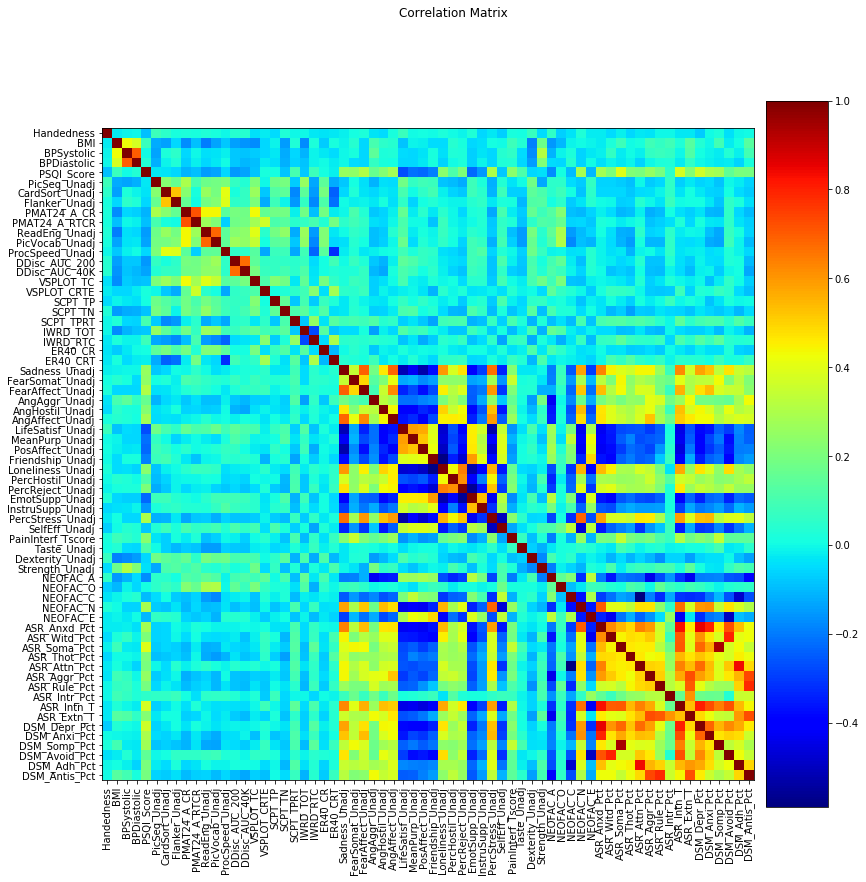

In [128]:
# Show that correlation
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_corr,cmap = mpl.cm.jet)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Correlation Matrix')

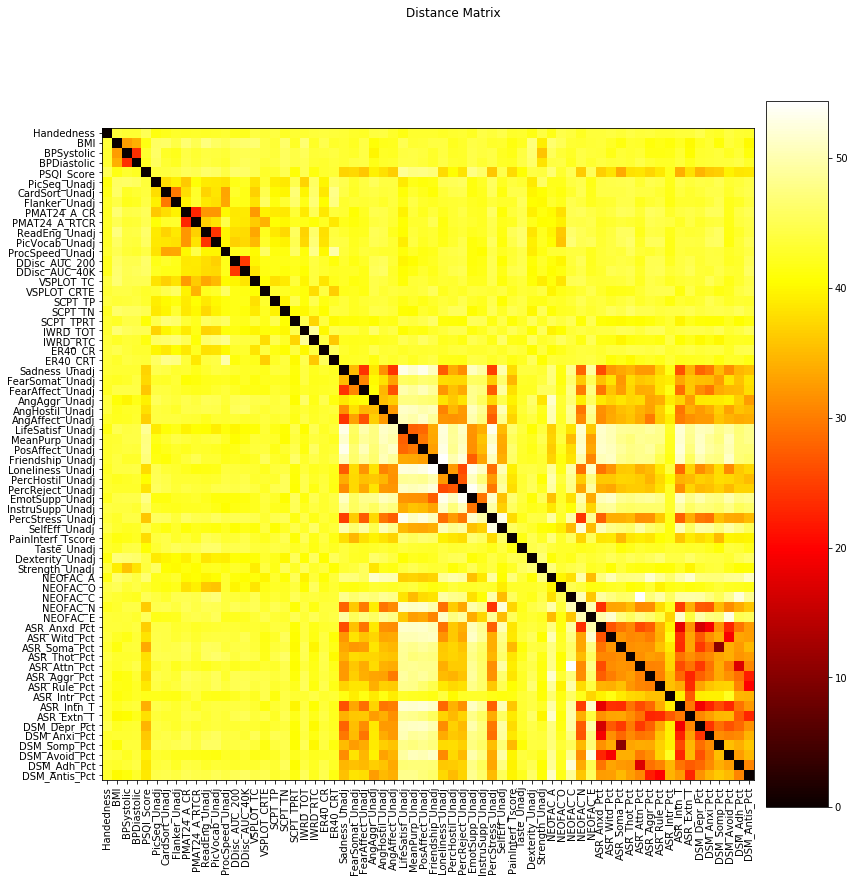

In [129]:
# Show that distance
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat,cmap = mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [130]:
# Now do some clustering on that
n_sbt = 9 # Number of subtypes
link = scl.hierarchy.linkage(pheno_dist, method='ward')
part = scl.hierarchy.fcluster(link, n_sbt, criterion='maxclust')
order = scl.hierarchy.dendrogram(link, no_plot=True)['leaves']

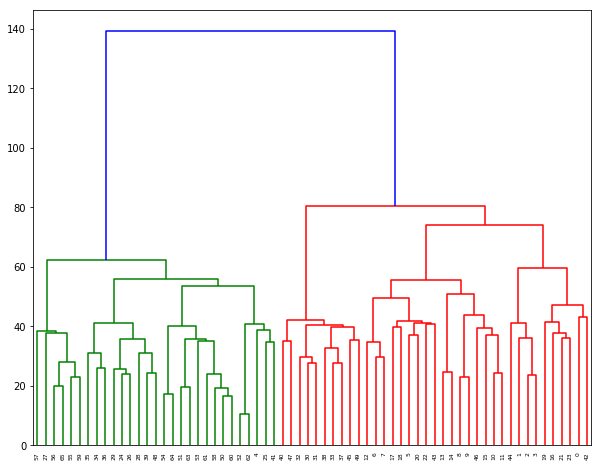

In [131]:
plt.figure(figsize=(10, 8))
dn = scl.hierarchy.dendrogram(link)

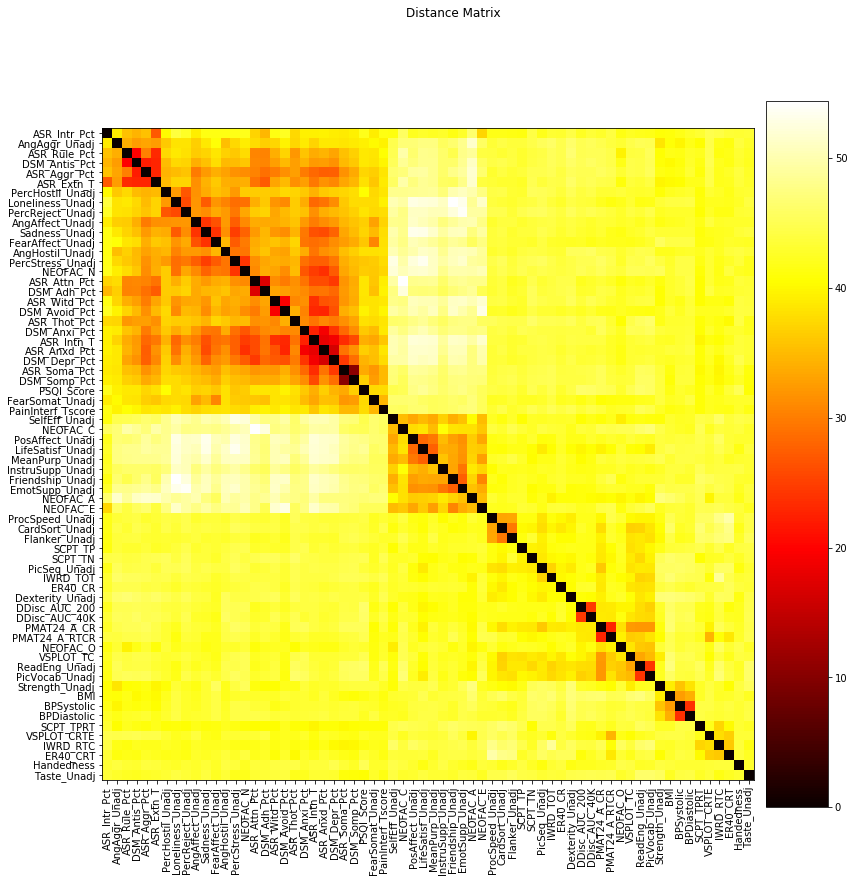

In [132]:
# Plot the distance matrix again, but now ordered by hierarchy
label_ord = [use_columns[ord] for ord in order]
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat[order, :][:, order],cmap =mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(label_ord)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(label_ord, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [133]:
# Here are the groups I found:
for sid in np.unique(part):
    match_cols = [use_columns[x] for x in np.where(part==sid)[0]]
    print('Subtype {} has the following variables:'.format(sid))
    for col in match_cols:
        print('    {}'.format(col))

Subtype 1 has the following variables:
    AngAggr_Unadj
    ASR_Aggr_Pct
    ASR_Rule_Pct
    ASR_Intr_Pct
    ASR_Extn_T
    DSM_Antis_Pct
Subtype 2 has the following variables:
    Sadness_Unadj
    FearAffect_Unadj
    AngHostil_Unadj
    AngAffect_Unadj
    Loneliness_Unadj
    PercHostil_Unadj
    PercReject_Unadj
    PercStress_Unadj
    NEOFAC_N
Subtype 3 has the following variables:
    ASR_Anxd_Pct
    ASR_Witd_Pct
    ASR_Thot_Pct
    ASR_Attn_Pct
    ASR_Intn_T
    DSM_Depr_Pct
    DSM_Anxi_Pct
    DSM_Avoid_Pct
    DSM_Adh_Pct
Subtype 4 has the following variables:
    PSQI_Score
    FearSomat_Unadj
    PainInterf_Tscore
    ASR_Soma_Pct
    DSM_Somp_Pct
Subtype 5 has the following variables:
    LifeSatisf_Unadj
    MeanPurp_Unadj
    PosAffect_Unadj
    Friendship_Unadj
    EmotSupp_Unadj
    InstruSupp_Unadj
    SelfEff_Unadj
    NEOFAC_A
    NEOFAC_C
    NEOFAC_E
Subtype 6 has the following variables:
    PicSeq_Unadj
    CardSort_Unadj
    Flanker_Unadj
    ProcSpeed_

In [134]:
# Make a new pheno table with the average scores of these subtypes
data = np.array([np.mean(use_pheno[[use_columns[x] for x in np.where(part==sid)[0]]],1) for sid in np.unique(part)])
ind = use_pheno.index
col_names = ['Subtype_{}'.format(x) for x in np.unique(part)]
sbt_pheno = pd.DataFrame(data=data.T, columns=col_names, index=ind)
# Merge this with the original dataframe so I can get all that other stuff I didn't use
merged_pheno = pd.merge(data_all_pheno, sbt_pheno, how='right', left_index=True, right_index=True)

In [135]:
# Look at it (new stuff on the right)
merged_pheno.head()

Subject  Age_in_Yrs  Gender  Handedness  Zygosity  Race  Ethnicity  \
0   100004          24       1          95       0.0     0          0   
1   100206          27       1          65       0.0     0          0   
2   100307          27       2          95       1.0     0          0   
3   100408          33       1          55       2.0     0          0   
4   100610          27       1          85       1.0     0          0   

   SSAGA_Income  SSAGA_Educ    BMI     ...      DSM_Antis_Pct  Subtype_1  \
0           4.0        14.0  25.49     ...               62.0  54.866667   
1           4.0        16.0  26.64     ...               57.0  55.900000   
2           7.0        16.0  22.96     ...               51.0  48.733333   
3           7.0        16.0  27.75     ...               51.0  52.316667   
4           6.0        16.0  36.91     ...               50.0  48.733333   

   Subtype_2  Subtype_3  Subtype_4  Subtype_5  Subtype_6    Subtype_7  \
0  55.466667  56.333333      42.44      32.87  86.411111  1981.782495   
1  56.222222  66.000000      51.18      41.26  96.106667  2357.885559   
2  49.822222  48.888889      37.76      43.84  92.916667  1513.467954   
3  46.044444  49.444444      42.46      47.05  90.843333   420.209302   
4  42.366667  55.000000      39.78      44.53  94.674444  1579.725260   

   Subtype_8   Subtype_9  
0    90.2425  755.233467  
1    87.2750  820.867633  
2    79.5750  720.998333  
3    99.7325  754.174283  
4    94.0175  678.822533  

[5 rows x 84 columns]

In [136]:
# Save the new thing so I can look at it later
merged_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/clustered_hcp_all_pheno_clean.csv'), index=False)

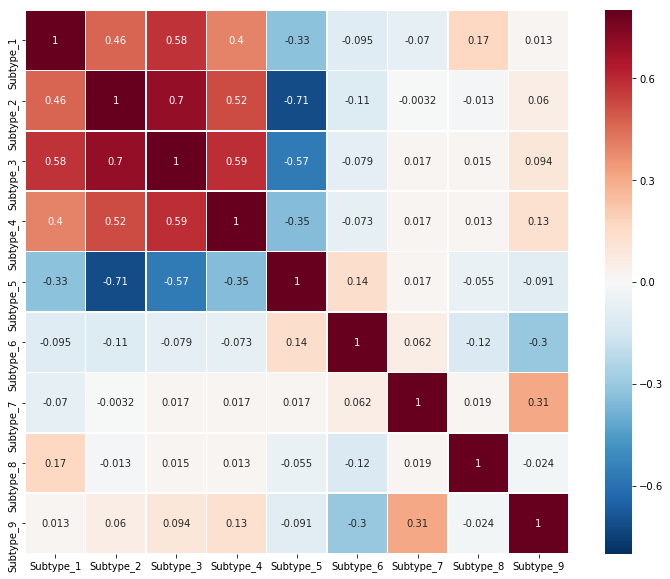

In [137]:
import seaborn as sns
f, ax = plt.subplots(figsize=(n_sbt+4, n_sbt+1))
sns.heatmap(merged_pheno.get(["Subtype_{}".format(x) for x in np.arange(1,n_sbt+1)]).corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

# Bootstraping pheno

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
# Add niak hcp and psomm to oactve path
%octave addpath(genpath('~/git/Misc'));
%octave build_path hcp niak psom

Adding library hcp to the search path.

Adding library niak to the search path.

Adding library psom to the search path.

In [140]:
# extract all table pheno value
df_stack = merged_pheno_norm.drop(['Subject'],axis=1)
y = df_stack.loc[:].values
LABELS_Y = list(df_stack.columns.values)

In [141]:
# push varaiable to octave
%octave_push LABELS_Y n_sbt y
%octave LABELS_Y = LABELS_Y';

In [142]:
%%octave -o R
R = corr(y);

ans =  1

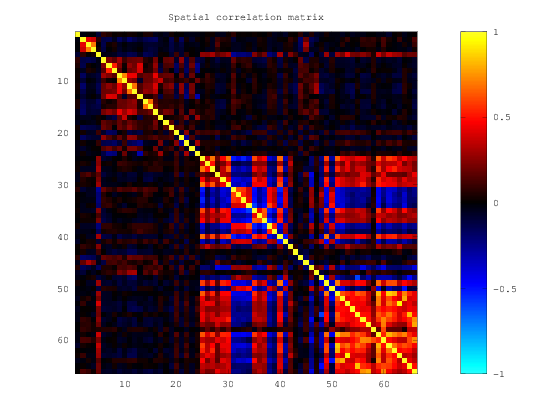

In [143]:
%%octave
niak_visu_matrix(R), axis square
title('Spatial correlation matrix')

In [144]:
%%octave -o stab,part_consensus,order_consensus
nb_samp = 100;
opt_b.block_length = 1; # That's a parameter for the bootstrap. We treat the subjects as independent observations. 
for ss = 1:nb_samp
    niak_progress(ss,nb_samp)
    y_s = niak_bootstrap_tseries(y,opt_b); # Bootstrap the subjects
    R_s = corr(y_s); # compute the correlation matrix for the bootstrap sample
    hier = niak_hierarchical_clustering(R_s,struct('flag_verbose',false)); # replication the hierarchical clustering
    part = niak_threshold_hierarchy(hier,struct('thresh',n_sbt)); # Cut the hierarchy to get clusters
    mat = niak_part2mat(part,true); # convert the partition into an adjacency matrix
    if ss == 1; stab = mat; else stab = stab+mat; end; # Add all adjacency matrices
end
stab = stab / nb_samp; # Divide by the number of replications to get the stability matrix
hier_consensus = niak_hierarchical_clustering(stab); # run a hierarchical clustering on the stability matrix
part_consensus = niak_threshold_hierarchy(hier_consensus,struct('thresh',n_sbt)); # cut the consensus hierarchy
order_consensus = niak_hier2order(hier_consensus); # order the regions based on the hierarchy

    Percentage done: 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100

     Percentage done : 0 6 11 15 20 26 31 35 40 46 51 55 60 66 71 75 80 86 91 95 100 Done ! 

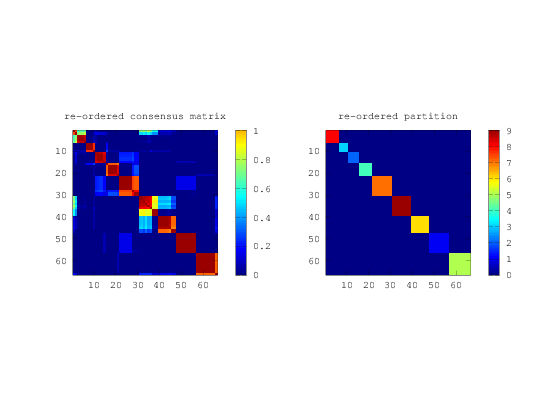

In [145]:
%%octave
order_consensus = niak_hier2order(hier_consensus);
subplot(1,2,1)
# Re-order the correlation matrix
imagesc(stab(order_consensus,order_consensus)), axis square, colorbar
title('re-ordered consensus matrix')
subplot(1,2,2)
# Show the re-ordered partition
niak_visu_part(part_consensus(order_consensus)), axis square
title('re-ordered partition')

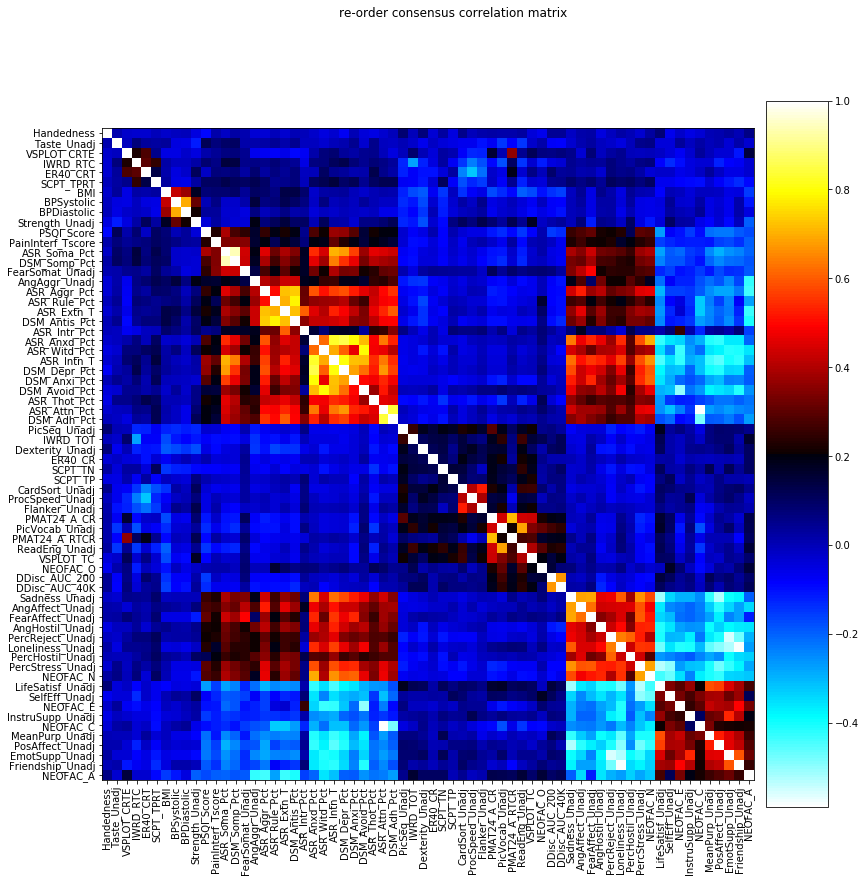

In [146]:
# Plot the distance matrix again, but now ordered by hierarchy
from nilearn import plotting as nplt
order_consensus_n = [int(i-1) for i in order_consensus]
label_ord = [use_columns[ordi] for ordi in order_consensus_n]
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(R[order_consensus_n, :][:, order_consensus_n],cmap =nplt.cm.cold_hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(label_ord)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(label_ord, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('re-order consensus correlation matrix')

In [147]:
# Here are the groups I found:
part_n = [int(i) for i in part_consensus]
for sid in np.unique(part_n):
    match_cols = [use_columns[x] for x in np.where(part_n==sid)[0]]
    print('Subtype {} has the following variables:'.format(sid))
    for col in match_cols:
        print('    {}'.format(col))

Subtype 1 has the following variables:
    Sadness_Unadj
    FearAffect_Unadj
    AngHostil_Unadj
    AngAffect_Unadj
    Loneliness_Unadj
    PercHostil_Unadj
    PercReject_Unadj
    PercStress_Unadj
    NEOFAC_N
Subtype 2 has the following variables:
    PSQI_Score
    FearSomat_Unadj
    PainInterf_Tscore
    ASR_Soma_Pct
    DSM_Somp_Pct
Subtype 3 has the following variables:
    BMI
    BPSystolic
    BPDiastolic
    Strength_Unadj
Subtype 4 has the following variables:
    AngAggr_Unadj
    ASR_Aggr_Pct
    ASR_Rule_Pct
    ASR_Intr_Pct
    ASR_Extn_T
    DSM_Antis_Pct
Subtype 5 has the following variables:
    LifeSatisf_Unadj
    MeanPurp_Unadj
    PosAffect_Unadj
    Friendship_Unadj
    EmotSupp_Unadj
    InstruSupp_Unadj
    SelfEff_Unadj
    NEOFAC_A
    NEOFAC_C
    NEOFAC_E
Subtype 6 has the following variables:
    PMAT24_A_CR
    PMAT24_A_RTCR
    ReadEng_Unadj
    PicVocab_Unadj
    DDisc_AUC_200
    DDisc_AUC_40K
    VSPLOT_TC
    NEOFAC_O
Subtype 7 has the following

In [149]:
t = R[order_consensus_n, :][:, order_consensus_n]

In [150]:
t.shape

(66, 66)

In [159]:
from matplotlib.colors import LinearSegmentedColormap

In [160]:
n = len(part_consensus)
oci = [int(i-1) for i in order_consensus]
pco = part_consensus[oci]
bh = [pos+1 for pos, i in enumerate(np.arange(1,n)) if not pco[i]==pco[i-1]]

In [161]:
cut_here = bh
cuts = [(i, 1) for i in cut_here]
o, i, c, cuts = space_mat(t, cuts)
im = np.ma.masked_where(i==0, i)

rm = breakcords(cuts, o.shape)
m = make_mask(o.shape, cuts, rm, 0, None)
ticks = fix_ticks(t.shape[0], cuts, 1)

In [162]:
s9_colors = ["#beb146",
"#8f62ca",
"#61af4b",
"#c75d9c",
"#4bb092",
"#cb5253",
"#6b8bcd",
"#cb7d3e",
"#717833"]
lin9 = LinearSegmentedColormap.from_list(name='s9',
                                          colors = s9_colors,
                                          N=9)

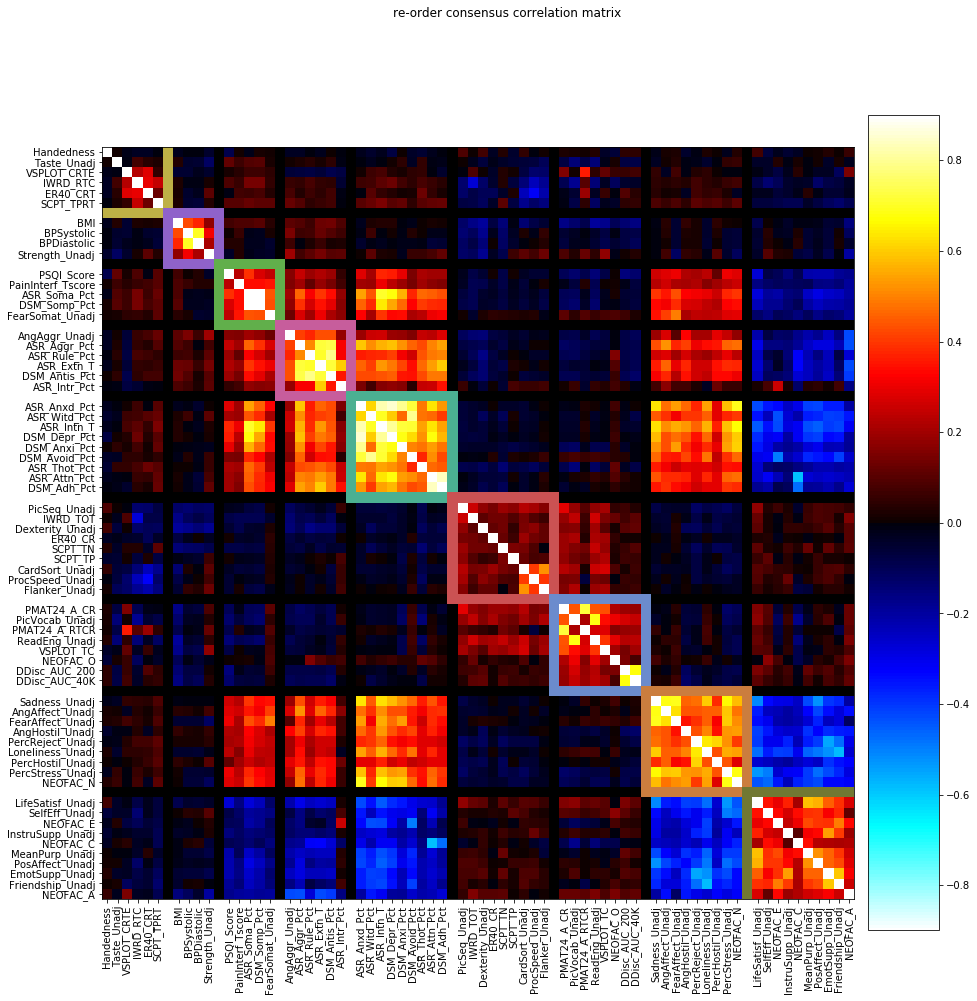

In [163]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(o, cmap=nplt.cm.cold_hot, vmin=-0.9, vmax=0.9)
tmp = ax.imshow(im, cmap=plt.cm.Greys_r)
tmp = ax.imshow(im, cmap=plt.cm.Greys, alpha=0)
tmp = ax.imshow(m, cmap=lin9)
tmp = ax.set_yticks(ticks)
tmp = ax.set_yticklabels(label_ord)
tmp = ax.set_xticks(ticks)
tmp = ax.set_xticklabels(label_ord, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('re-order consensus correlation matrix')
f.savefig('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/Figures/associations/pheno_cluster.svg')

In [155]:
def space_mat(mat, cuts):
    # Currently can only handle 2 dim
    if not len(mat.shape)==2:
        raise Exception('Get that non twodimensional shit out of here!')
    
    cutpos = np.array([i[0] for i in cuts])
    # Make sure all positions are unique
    if not len(np.unique(cutpos))==len(cutpos):
        # Deal with the duplicates and non-duplicates separately
        spread = np.array([i[1] for i in cuts])
        # Find Duplicates
        v, c = np.unique(cutpos, return_counts=True)
        duplicates = v[c>1]
        # Get the non-duplicates
        non_dupl = [i for i in cuts if not i[0] in duplicates]
        # Set the spread to max of the duplicates
        dupl = list()
        for dup in duplicates:
            # Get index of other duplicates
            dind = np.argwhere(cutpos==dup)
            maxspread = np.max(spread[dind])
            dupl.append((dup, maxspread))
        # Combine the two lists
        cuts = non_dupl + dupl
        print('I found duplicates and took the biggest spread.')
        
    cutpos = np.array([i[0] for i in cuts])
    # Sort the positions in case they aren't already
    cutorder = np.argsort(cutpos)
    cutord = cutpos[cutorder]
    cutpad = np.array([i[1] for i in cuts])[cutorder]
    # Get the amount of total padding
    n_pad = np.sum(cutpad)
    # Create the output matrix
    vmat = np.zeros((mat.shape[0], mat.shape[1]+n_pad))
    omat = np.zeros([i+n_pad for i in mat.shape])
    invmat = np.zeros([i+n_pad for i in mat.shape])
    clustmat = np.zeros([i+n_pad for i in mat.shape])
    
    # Do this vertically first
    padsum = 0
    for cid, cut in enumerate(cutpos):
        if cid == 0:
            vmat[:, :cutord[cid]] = mat[:, :cutord[cid]]
            padsum = cutpad[cid]
        else:
            vmat[:, cutord[cid-1]+padsum:cutord[cid]+padsum] = mat[:, cutord[cid-1]:cutord[cid]]
            padsum += cutpad[cid]
            
    vmat[:, cutord[cid]+padsum:] = mat[:, cutord[cid]:]
    
    # Do this horizontally now and for the inverse matrix
    padsum = 0
    lastpos = 0
    for cid, cut in enumerate(cutpos):
        invmat[cutord[cid]+padsum:cutord[cid]+cutpad[cid]+padsum, :] = 1
        invmat[:, cutord[cid]+padsum:cutord[cid]+cutpad[cid]+padsum] = 1
        
        if cid == 0:
            omat[:cutord[cid], :] = vmat[:cutord[cid], :]
            
            select = tuple(np.arange(cutord[cid], cutord[cid]+cutpad[cid]+1))
            # Columns
            clustmat[:cutord[cid]+padsum+cutpad[cid], select] = cid+1
            # Rows
            clustmat[select, :cutord[cid]+padsum+cutpad[cid]] = cid+1
            
            padsum = cutpad[cid]
            lastpos = cutord[cid] + padsum
            
        else:
            omat[cutord[cid-1]+padsum:cutord[cid]+padsum, :] = vmat[cutord[cid-1]:cutord[cid], :]
            select_f = tuple(np.arange(cutord[cid-1]+padsum-cutpad[cid-1], cutord[cid-1]+padsum))
            select_b = tuple(np.arange(cutord[cid]+padsum, cutord[cid]+padsum+cutpad[cid]))
            select = select_f + select_b
            # Columns
            clustmat[lastpos:cutord[cid]+padsum+cutpad[cid], select] = cid+1
            # Rows
            clustmat[select, lastpos:cutord[cid]+padsum+cutpad[cid]] = cid+1
            
            padsum += cutpad[cid]
            lastpos = cutord[cid] + padsum

    omat[cutord[cid]+padsum:, :] = vmat[cutord[cid]:, :]
    # Add last cluster
    # TODO: make this less hacky, only works if 
    # last cluster was also the last before bottom right
    clustmat[lastpos:, select_b] = cid+2
    clustmat[select_b, lastpos:] = cid+2
    
    return omat, invmat, clustmat, cuts

In [156]:
def fix_ticks(n_elements, cuts, pad):
    '''
    Function to compute the new tick positions.
    
    n_elements are the number of elements in the original data
    (original_data.shape[0])
    cuts is the list of breakpoints
    pad is the number of empty voxels added after each breakpoint
    '''
    breaks = np.array([c[0] for c in cuts])

    l = []
    run = -1
    for i in np.arange(n_elements):
        if not i in breaks:
            run += 1
            l.append(run)
        else:
            run += 1+pad
            l.append(run)
    return l

In [157]:
def breakcords(cuts, shape):
    breaks = np.array([c[0] for c in cuts])
    pads = np.array([p[1] for p in cuts])
    
    tmp = [[cid]*(pads[np.argwhere(breaks==cid)][0][0]+1) if cid in breaks else [cid] for cid in np.arange(shape[0])]
    remap = np.array([coord for subl in tmp for coord in subl])
    
    return remap

In [158]:
def make_mask(shape, cuts, remap, start, stop):
    mask = np.zeros(shape)
    order = np.argsort([i[0] for i in cuts])
    sort_cut = np.array(cuts)[order][:, 0]
    mk = np.zeros_like(remap, dtype=bool)
    
    for cid, cut in enumerate(sort_cut):
        mk = np.zeros_like(remap, dtype=bool)
        # Drop last voxel in remap (no idea why that's there)
        mk[np.where(remap==cut)[0][:-1]] = True
        
        rm_cut = np.argwhere(mk)
        if cid==0:
            mask[mk, start:np.max(rm_cut)] = cid+1
            mask[start:np.max(rm_cut), mk] = cid+1
        else:
            cut_back = sort_cut[cid-1]
            mk_b = np.zeros_like(remap, dtype=bool)
            mk_b[np.where(remap==cut_back)[0][:-1]] = True
            rm_cut_back = np.argwhere(mk_b)
            
            # Drop last voxel in remap (no idea why that's there)
            mk_b[np.where(remap==cut_back)[0][:-1]] = True
            # Row
            mask[mk|mk_b, np.min(rm_cut_back):np.max(rm_cut)] = cid+1
            # Column
            mask[np.min(rm_cut_back):np.max(rm_cut), mk|mk_b] = cid+1
    # Last thing
    mask[mk, np.min(rm_cut):stop] = cid+2
    mask[np.min(rm_cut):stop, mk] = cid+2
            
    out_mask = np.ma.masked_where(mask==0, mask)
    return out_mask

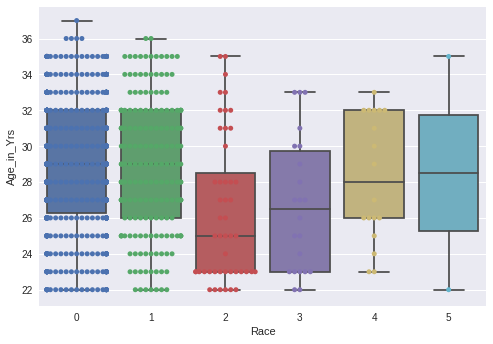

In [91]:
f = plt.figure()
ax = f.add_subplot(111)
sns.swarmplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)
sns.boxplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)

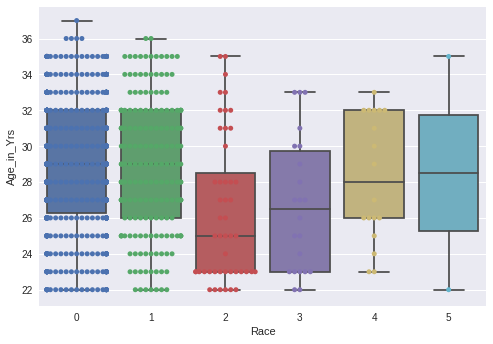

In [91]:
f = plt.figure()
ax = f.add_subplot(111)
sns.swarmplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)
sns.boxplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)